# Muhammad Farhan Arya Wicaksono (5054231011)
---

#  Weather Forecasting  Data

## Setup

In [1]:
# Import Library
import os
import pandas as pd
from xgboost import XGBRegressor
import warnings
# from sklearn.metrics import root_mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import root_mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

DATA_DIR = "data"
SUBMISSION_DIR = "submission"
TRAIN_PATH = os.path.join(DATA_DIR, "train.csv")
TEST_PATH = os.path.join(DATA_DIR, "test_case.csv")
SUBMISSION_PATH = os.path.join(DATA_DIR, "sample_submission.csv")
TARGET = "apparent_temperature (°C)"

"""
Change filename
"""
SUBMISSION_NAME = "submission_1.csv" 
SUBMISSION_FILE = os.path.join(SUBMISSION_DIR, SUBMISSION_NAME)


In [2]:
# set disply column
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.options.display.max_colwidth = 500
warnings.filterwarnings("ignore")

In [3]:
# Load Data
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test_case.csv')
submission = pd.read_csv(SUBMISSION_PATH)

## Exploratory Data Analysis

In [4]:
train.head()

time  temperature_2m (°C)  relativehumidity_2m (%)  dewpoint_2m (°C)  apparent_temperature (°C)  pressure_msl (hPa)  surface_pressure (hPa)  snowfall (cm)  cloudcover (%)  cloudcover_low (%)  cloudcover_mid (%)  cloudcover_high (%)  shortwave_radiation (W/m²)  direct_radiation (W/m²)  diffuse_radiation (W/m²)  direct_normal_irradiance (W/m²)  windspeed_10m (km/h)  windspeed_100m (km/h)  winddirection_10m (°)  winddirection_100m (°)  windgusts_10m (km/h)  et0_fao_evapotranspiration (mm)  vapor_pressure_deficit (kPa)  soil_temperature_0_to_7cm (°C)  soil_temperature_7_to_28cm (°C)  soil_temperature_28_to_100cm (°C)  soil_temperature_100_to_255cm (°C)  soil_moisture_0_to_7cm (m³/m³)  soil_moisture_7_to_28cm (m³/m³)  soil_moisture_28_to_100cm (m³/m³)  soil_moisture_100_to_255cm (m³/m³) city      id
0  2018-06-01T09:00                 28.8                     78.0              24.6                       33.7              1010.8                  1010.3            0.0            50.0                13.0                17.0                 93.0                       460.0                    190.0                     270.0                            222.1                  11.4                   15.3                  204.0                   204.0                  25.9                             0.33                          0.88                            29.0                             26.7                               26.9                                27.0                           0.386                            0.391                              0.398                               0.397    p  130473
1  2020-03-15T04:00                 24.9                     97.0              24.4                       31.9              1008.5                  1010.2            0.0            20.0                 2.0                28.0                  4.0                         0.0                      0.0                       0.0                              0.0                   2.6                    5.8                  164.0                   120.0                   7.6                             0.00                          0.09                            25.8                             27.5                               27.0                                26.5                           0.344                            0.348                              0.316                               0.401   lh  177964
2  2021-03-11T11:00                 28.7                     64.0              21.3                       34.4              1013.6                  1015.3            0.0            76.0                32.0                39.0                 79.0                       779.0                    618.0                     161.0                            720.9                   7.6                    9.4                    8.0                     7.0                  18.7                             0.56                          1.41                            28.7                             25.9                               26.4                                26.1                           0.300                            0.286                              0.328                               0.418   lh  186635
3  2018-06-29T01:00                 24.9                     90.0              23.1                       28.3              1012.8                   987.2            0.0            65.0                48.0                 0.0                 73.0                         0.0                      0.0                       0.0                              0.0                  14.5                   18.7                  113.0                   115.0                  27.7                             0.01                          0.31                            24.8                             25.1                               25.3                                25.4                           0.076                            

Menambah Fitur

In [5]:
train['time'] = pd.to_datetime(train['time'])

In [6]:
train['hour'] = train['time'].dt.hour
train['month'] = train['time'].dt.month
train['day'] = train['time'].dt.day
train['year'] = train['time'].dt.year

In [7]:
# sort based on time
train.sort_values('time', inplace=True)
# train.set_index('time', inplace=True)

In [8]:
train.head()

time  temperature_2m (°C)  relativehumidity_2m (%)  dewpoint_2m (°C)  apparent_temperature (°C)  pressure_msl (hPa)  surface_pressure (hPa)  snowfall (cm)  cloudcover (%)  cloudcover_low (%)  cloudcover_mid (%)  cloudcover_high (%)  shortwave_radiation (W/m²)  direct_radiation (W/m²)  diffuse_radiation (W/m²)  direct_normal_irradiance (W/m²)  windspeed_10m (km/h)  windspeed_100m (km/h)  winddirection_10m (°)  winddirection_100m (°)  windgusts_10m (km/h)  et0_fao_evapotranspiration (mm)  vapor_pressure_deficit (kPa)  soil_temperature_0_to_7cm (°C)  soil_temperature_7_to_28cm (°C)  soil_temperature_28_to_100cm (°C)  soil_temperature_100_to_255cm (°C)  soil_moisture_0_to_7cm (m³/m³)  soil_moisture_7_to_28cm (m³/m³)  soil_moisture_28_to_100cm (m³/m³)  soil_moisture_100_to_255cm (m³/m³) city      id  hour  month  day  year
3101   2018-01-01                 25.4                     87.0              23.0                       30.2              1007.5                  1007.0            0.0            50.0                13.0                14.0                 99.0                         0.0                      0.0                       0.0                              0.0                   4.8                    7.8                   27.0                    34.0                  18.4                              0.0                          0.43                            27.0                             27.5                               27.3                                27.1                           0.405                            0.403                              0.396                               0.390    p  126840     0      1    1  2018
150195 2018-01-01                 25.5                     96.0              24.9                       32.0              1008.2                   990.9            0.0            33.0                 2.0                 3.0                 97.0                         0.0                      0.0                       0.0                              0.0                   3.4                    3.3                  198.0                   193.0                   6.8                              0.0                          0.12                            22.4                             24.3                               24.1                                24.2                           0.424                            0.433                              0.402                               0.446   le   95064     0      1    1  2018
131097 2018-01-01                 25.0                     94.0              24.1                       32.3              1007.0                  1009.3            0.0            82.0                33.0                37.0                100.0                         0.0                      0.0                       0.0                              0.0                   3.4                    4.0                  252.0                   270.0                  10.1                              0.0                          0.18                            26.8                             28.5                               28.7                                29.3                           0.298                            0.307                              0.281                               0.280   su       0     0      1    1  2018
16210  2018-01-01                 16.5                     99.0              16.3                       19.5              1013.4                   879.7            0.0           100.0                90.0                81.0                100.0                         0.0                      0.0                       0.0                              0.0                   1.5                    3.3                  346.0                     6.0                  10.1                              0.0                          0.02                            18.1                             19.2                               19.5        

information data

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 238644 entries, 3101 to 164467
Data columns (total 37 columns):
 #   Column                              Non-Null Count   Dtype         
---  ------                              --------------   -----         
 0   time                                238644 non-null  datetime64[ns]
 1   temperature_2m (°C)                 238525 non-null  float64       
 2   relativehumidity_2m (%)             238525 non-null  float64       
 3   dewpoint_2m (°C)                    238525 non-null  float64       
 4   apparent_temperature (°C)           238525 non-null  float64       
 5   pressure_msl (hPa)                  238525 non-null  float64       
 6   surface_pressure (hPa)              238525 non-null  float64       
 7   snowfall (cm)                       238525 non-null  float64       
 8   cloudcover (%)                      238525 non-null  float64       
 9   cloudcover_low (%)                  238525 non-null  float64       
 10  cloudcover

All data in numeric value kecuali time

describe Data

In [10]:
(train.describe().T)

count                           mean                  min                  25%                  50%                  75%                  max           std
time                                  238644  2019-10-07 18:48:07.765876992  2018-01-01 00:00:00  2018-11-07 17:00:00  2019-09-14 11:00:00  2020-08-28 14:00:00  2022-12-28 23:00:00           NaN
temperature_2m (°C)                 238525.0                       24.98802                  7.8                 24.1                 26.1                 27.8                 36.9      4.670449
relativehumidity_2m (%)             238525.0                      85.377025                 21.0                 80.0                 88.0                 93.0                100.0     11.328758
dewpoint_2m (°C)                    238525.0                      22.162759                  6.0                 21.2                 23.7                 24.6                 29.6      3.840004
apparent_temperature (°C)           238525.0                      30.138572                  6.2                 29.0                 31.9                 34.1                 46.2       6.48824
pressure_msl (hPa)                  238525.0                    1011.338306               1002.7               1009.5               1011.1               1012.8               1022.6      2.672479
surface_pressure (hPa)              238525.0                     966.926108                738.2                984.8                992.2               1010.5               1018.8     72.632241
snowfall (cm)                       238525.0                            0.0                  0.0                  0.0                  0.0                  0.0                  0.0           0.0
cloudcover (%)                      238525.0                      55.046938                  0.0                 32.0                 52.0                 80.0                100.0     29.215363
cloudcover_low (%)                  238525.0                      24.106253                  0.0                  5.0                 15.0                 32.0                100.0     25.998342
cloudcover_mid (%)                  238525.0                      27.528812                  0.0                  5.0                 18.0                 40.0                100.0     28.259006
cloudcover_high (%)                 238525.0                      68.198017                  0.0                 37.0                 89.0                 98.0                100.0     37.069607
shortwave_radiation (W/m²)          238525.0                     217.018107                  0.0                  0.0                 10.0                423.0               1078.0    293.243855
direct_radiation (W/m²)             238525.0                      144.74487                  0.0                  0.0                  1.0                239.0                966.0    224.947746
diffuse_radiation (W/m²)            238525.0                      72.273238                  0.0                  0.0                  8.0                132.0                476.0     94.485913
direct_normal_irradiance (W/m²)     238532.0                     202.861171                  0.0                  0.0                  0.0                412.3                998.1    276.614083
windspeed_10m (km/h)                238525.0                       6.224378                  0.0                  3.2                  5.2                  8.4                 33.1       4.15124
windspeed_100m (km/h)               238525.0                       8.788467                  0.0                  4.7                  7.6                 12.0                 42.5      5.439981
winddirection_10m (°)               238193.0                     174.976775                  1.0                108.0                180.0                236.0                360.0     88.625904
winddirection_100m (°)              238384.0                     173.566787                  1.0                106.0                173.0 

In [11]:
train.nunique()

time                                   33336
temperature_2m (°C)                      284
relativehumidity_2m (%)                   80
dewpoint_2m (°C)                         226
apparent_temperature (°C)                378
pressure_msl (hPa)                       197
surface_pressure (hPa)                   599
snowfall (cm)                              1
cloudcover (%)                           101
cloudcover_low (%)                       101
cloudcover_mid (%)                       101
cloudcover_high (%)                      101
shortwave_radiation (W/m²)              1068
direct_radiation (W/m²)                  950
diffuse_radiation (W/m²)                 464
direct_normal_irradiance (W/m²)         9374
windspeed_10m (km/h)                     293
windspeed_100m (km/h)                    369
winddirection_10m (°)                    360
winddirection_100m (°)                   360
windgusts_10m (km/h)                     172
et0_fao_evapotranspiration (mm)           98
vapor_pres

Snowfall hanya punya satu nilai uniqe

In [12]:
train['snowfall (cm)'].value_counts()

snowfall (cm)
0.0    238525
Name: count, dtype: int64

check Duplicate Value

In [13]:
train.duplicated().sum()

0

Check null value

In [14]:
train.isnull().any()

time                                  False
temperature_2m (°C)                    True
relativehumidity_2m (%)                True
dewpoint_2m (°C)                       True
apparent_temperature (°C)              True
pressure_msl (hPa)                     True
surface_pressure (hPa)                 True
snowfall (cm)                          True
cloudcover (%)                         True
cloudcover_low (%)                     True
cloudcover_mid (%)                     True
cloudcover_high (%)                    True
shortwave_radiation (W/m²)             True
direct_radiation (W/m²)                True
diffuse_radiation (W/m²)               True
direct_normal_irradiance (W/m²)        True
windspeed_10m (km/h)                   True
windspeed_100m (km/h)                  True
winddirection_10m (°)                  True
winddirection_100m (°)                 True
windgusts_10m (km/h)                   True
et0_fao_evapotranspiration (mm)        True
vapor_pressure_deficit (kPa)    

In [15]:
train.isnull().sum()

time                                    0
temperature_2m (°C)                   119
relativehumidity_2m (%)               119
dewpoint_2m (°C)                      119
apparent_temperature (°C)             119
pressure_msl (hPa)                    119
surface_pressure (hPa)                119
snowfall (cm)                         119
cloudcover (%)                        119
cloudcover_low (%)                    119
cloudcover_mid (%)                    119
cloudcover_high (%)                   119
shortwave_radiation (W/m²)            119
direct_radiation (W/m²)               119
diffuse_radiation (W/m²)              119
direct_normal_irradiance (W/m²)       112
windspeed_10m (km/h)                  119
windspeed_100m (km/h)                 119
winddirection_10m (°)                 451
winddirection_100m (°)                260
windgusts_10m (km/h)                  119
et0_fao_evapotranspiration (mm)       119
vapor_pressure_deficit (kPa)          119
soil_temperature_0_to_7cm (°C)    

Rata2 jumlah null value pada tiap fetures adalah 119

In [16]:
# contoh col temp 2m
train[train['temperature_2m (°C)'].isnull() ==True].head()

time  temperature_2m (°C)  relativehumidity_2m (%)  dewpoint_2m (°C)  apparent_temperature (°C)  pressure_msl (hPa)  surface_pressure (hPa)  snowfall (cm)  cloudcover (%)  cloudcover_low (%)  cloudcover_mid (%)  cloudcover_high (%)  shortwave_radiation (W/m²)  direct_radiation (W/m²)  diffuse_radiation (W/m²)  direct_normal_irradiance (W/m²)  windspeed_10m (km/h)  windspeed_100m (km/h)  winddirection_10m (°)  winddirection_100m (°)  windgusts_10m (km/h)  et0_fao_evapotranspiration (mm)  vapor_pressure_deficit (kPa)  soil_temperature_0_to_7cm (°C)  soil_temperature_7_to_28cm (°C)  soil_temperature_28_to_100cm (°C)  soil_temperature_100_to_255cm (°C)  soil_moisture_0_to_7cm (m³/m³)  soil_moisture_7_to_28cm (m³/m³)  soil_moisture_28_to_100cm (m³/m³)  soil_moisture_100_to_255cm (m³/m³) city      id  hour  month  day  year
139107 2022-12-28 07:00:00                  NaN                      NaN               NaN                        NaN                 NaN                     NaN            NaN             NaN                 NaN                 NaN                  NaN                         NaN                      NaN                       NaN                              0.0                   NaN                    NaN                    NaN                     NaN                   NaN                              NaN                           NaN                             NaN                              NaN                                NaN                                 NaN                             NaN                              NaN                                NaN                                 NaN    p  158647     7     12   28  2022
216504 2022-12-28 07:00:00                  NaN                      NaN               NaN                        NaN                 NaN                     NaN            NaN             NaN                 NaN                 NaN                  NaN                         NaN                      NaN                       NaN                            187.6                   NaN                    NaN                    NaN                     NaN                   NaN                              NaN                           NaN                             NaN                              NaN                                NaN                                 NaN                             NaN                              NaN                                NaN                                 NaN    u   95047     7     12   28  2022
9653   2022-12-28 07:00:00                  NaN                      NaN               NaN                        NaN                 NaN                     NaN            NaN             NaN                 NaN                 NaN                  NaN                         NaN                      NaN                       NaN                            182.5                   NaN                    NaN                    NaN                     NaN                   NaN                              NaN                           NaN                             NaN                              NaN                                NaN                                 NaN                             NaN                              NaN                                NaN                                 NaN   si   63391     7     12   28  2022
80197  2022-12-28 07:00:00                  NaN                      NaN               NaN                        NaN                 NaN                     NaN            NaN             NaN                 NaN                 NaN                  NaN                         NaN                      NaN                       NaN                              0.0                   NaN                    NaN                    NaN                     NaN                   NaN                              NaN                           NaN                             NaN                              NaN       

In [17]:
train[train['temperature_2m (°C)'].isnull() ==True].tail(5)

time  temperature_2m (°C)  relativehumidity_2m (%)  dewpoint_2m (°C)  apparent_temperature (°C)  pressure_msl (hPa)  surface_pressure (hPa)  snowfall (cm)  cloudcover (%)  cloudcover_low (%)  cloudcover_mid (%)  cloudcover_high (%)  shortwave_radiation (W/m²)  direct_radiation (W/m²)  diffuse_radiation (W/m²)  direct_normal_irradiance (W/m²)  windspeed_10m (km/h)  windspeed_100m (km/h)  winddirection_10m (°)  winddirection_100m (°)  windgusts_10m (km/h)  et0_fao_evapotranspiration (mm)  vapor_pressure_deficit (kPa)  soil_temperature_0_to_7cm (°C)  soil_temperature_7_to_28cm (°C)  soil_temperature_28_to_100cm (°C)  soil_temperature_100_to_255cm (°C)  soil_moisture_0_to_7cm (m³/m³)  soil_moisture_7_to_28cm (m³/m³)  soil_moisture_28_to_100cm (m³/m³)  soil_moisture_100_to_255cm (m³/m³) city      id  hour  month  day  year
98562  2022-12-28 23:00:00                  NaN                      NaN               NaN                        NaN                 NaN                     NaN            NaN             NaN                 NaN                 NaN                  NaN                         NaN                      NaN                       NaN                              NaN                   NaN                    NaN                    NaN                     NaN                   NaN                              NaN                           NaN                             NaN                              NaN                                NaN                                 NaN                             NaN                              NaN                                NaN                                 NaN    u   95063    23     12   28  2022
231237 2022-12-28 23:00:00                  NaN                      NaN               NaN                        NaN                 NaN                     NaN            NaN             NaN                 NaN                 NaN                  NaN                         NaN                      NaN                       NaN                              NaN                   NaN                    NaN                    NaN                     NaN                   NaN                              NaN                           NaN                             NaN                              NaN                                NaN                                 NaN                             NaN                              NaN                                NaN                                 NaN    b  222719    23     12   28  2022
65902  2022-12-28 23:00:00                  NaN                      NaN               NaN                        NaN                 NaN                     NaN            NaN             NaN                 NaN                 NaN                  NaN                         NaN                      NaN                       NaN                              NaN                   NaN                    NaN                    NaN                     NaN                   NaN                              NaN                           NaN                             NaN                              NaN                                NaN                                 NaN                             NaN                              NaN                                NaN                                 NaN   lh  190439    23     12   28  2022
202574 2022-12-28 23:00:00                  NaN                      NaN               NaN                        NaN                 NaN                     NaN            NaN             NaN                 NaN                 NaN                  NaN                         NaN                      NaN                       NaN                              NaN                   NaN                    NaN                    NaN                     NaN                   NaN                              NaN                           NaN                             NaN                              NaN       

In [18]:
train[train['temperature_2m (°C)'].isnull() ==True]

time  temperature_2m (°C)  relativehumidity_2m (%)  dewpoint_2m (°C)  apparent_temperature (°C)  pressure_msl (hPa)  surface_pressure (hPa)  snowfall (cm)  cloudcover (%)  cloudcover_low (%)  cloudcover_mid (%)  cloudcover_high (%)  shortwave_radiation (W/m²)  direct_radiation (W/m²)  diffuse_radiation (W/m²)  direct_normal_irradiance (W/m²)  windspeed_10m (km/h)  windspeed_100m (km/h)  winddirection_10m (°)  winddirection_100m (°)  windgusts_10m (km/h)  et0_fao_evapotranspiration (mm)  vapor_pressure_deficit (kPa)  soil_temperature_0_to_7cm (°C)  soil_temperature_7_to_28cm (°C)  soil_temperature_28_to_100cm (°C)  soil_temperature_100_to_255cm (°C)  soil_moisture_0_to_7cm (m³/m³)  soil_moisture_7_to_28cm (m³/m³)  soil_moisture_28_to_100cm (m³/m³)  soil_moisture_100_to_255cm (m³/m³) city      id  hour  month  day  year
139107 2022-12-28 07:00:00                  NaN                      NaN               NaN                        NaN                 NaN                     NaN            NaN             NaN                 NaN                 NaN                  NaN                         NaN                      NaN                       NaN                              0.0                   NaN                    NaN                    NaN                     NaN                   NaN                              NaN                           NaN                             NaN                              NaN                                NaN                                 NaN                             NaN                              NaN                                NaN                                 NaN    p  158647     7     12   28  2022
216504 2022-12-28 07:00:00                  NaN                      NaN               NaN                        NaN                 NaN                     NaN            NaN             NaN                 NaN                 NaN                  NaN                         NaN                      NaN                       NaN                            187.6                   NaN                    NaN                    NaN                     NaN                   NaN                              NaN                           NaN                             NaN                              NaN                                NaN                                 NaN                             NaN                              NaN                                NaN                                 NaN    u   95047     7     12   28  2022
9653   2022-12-28 07:00:00                  NaN                      NaN               NaN                        NaN                 NaN                     NaN            NaN             NaN                 NaN                 NaN                  NaN                         NaN                      NaN                       NaN                            182.5                   NaN                    NaN                    NaN                     NaN                   NaN                              NaN                           NaN                             NaN                              NaN                                NaN                                 NaN                             NaN                              NaN                                NaN                                 NaN   si   63391     7     12   28  2022
80197  2022-12-28 07:00:00                  NaN                      NaN               NaN                        NaN                 NaN                     NaN            NaN             NaN                 NaN                 NaN                  NaN                         NaN                      NaN                       NaN                              0.0                   NaN                    NaN                    NaN                     NaN                   NaN                              NaN                           NaN                             NaN                              NaN       

In [19]:
print(train[train['temperature_2m (°C)'].isnull() ==True].value_counts('year'), "\n")
print(train[train['temperature_2m (°C)'].isnull() ==True].value_counts('month'),"\n")
print(train[train['temperature_2m (°C)'].isnull() ==True].value_counts('day'),"\n")
print(train[train['temperature_2m (°C)'].isnull() ==True].value_counts('hour'),"\n")
print(train[train['temperature_2m (°C)'].isnull() ==True].value_counts('city'),"\n")

year
2022    119
Name: count, dtype: int64 

month
12    119
Name: count, dtype: int64 

day
28    119
Name: count, dtype: int64 

hour
7     7
16    7
22    7
21    7
20    7
19    7
18    7
17    7
15    7
8     7
14    7
13    7
12    7
11    7
10    7
9     7
23    7
Name: count, dtype: int64 

city
b     17
le    17
lh    17
p     17
si    17
su    17
u     17
Name: count, dtype: int64 



Wind direction

In [20]:
print(train[train['winddirection_10m (°)'].isnull() ==True].value_counts('year'), "\n")

year
2022    178
2019     86
2018     75
2021     70
2020     42
Name: count, dtype: int64 



winddirection_10m (°)

In [21]:
train[train['winddirection_10m (°)'].isnull() ==True].head(5)

time  temperature_2m (°C)  relativehumidity_2m (%)  dewpoint_2m (°C)  apparent_temperature (°C)  pressure_msl (hPa)  surface_pressure (hPa)  snowfall (cm)  cloudcover (%)  cloudcover_low (%)  cloudcover_mid (%)  cloudcover_high (%)  shortwave_radiation (W/m²)  direct_radiation (W/m²)  diffuse_radiation (W/m²)  direct_normal_irradiance (W/m²)  windspeed_10m (km/h)  windspeed_100m (km/h)  winddirection_10m (°)  winddirection_100m (°)  windgusts_10m (km/h)  et0_fao_evapotranspiration (mm)  vapor_pressure_deficit (kPa)  soil_temperature_0_to_7cm (°C)  soil_temperature_7_to_28cm (°C)  soil_temperature_28_to_100cm (°C)  soil_temperature_100_to_255cm (°C)  soil_moisture_0_to_7cm (m³/m³)  soil_moisture_7_to_28cm (m³/m³)  soil_moisture_28_to_100cm (m³/m³)  soil_moisture_100_to_255cm (m³/m³) city      id  hour  month  day  year
132004 2018-01-02 10:00:00                 31.1                     67.0              24.3                       38.7              1008.5                   991.5            0.0            37.0                 6.0                 6.0                 93.0                       724.0                    545.0                     179.0                            739.5                   0.0                    0.4                    NaN                   180.0                  14.4                             0.55                          1.47                            26.9                             24.2                               24.2                                24.2                           0.412                            0.418                              0.400                               0.445   le   95098    10      1    2  2018
125167 2018-01-06 09:00:00                 20.0                     79.0              16.2                       23.7              1012.8                   880.9            0.0            52.0                 2.0                35.0                 98.0                       338.0                    168.0                     170.0                            283.6                   0.0                    0.4                    NaN                    90.0                  11.5                             0.21                          0.49                            19.2                             18.9                               19.4                                19.8                           0.393                            0.405                              0.412                               0.430    b  190569     9      1    6  2018
131700 2018-01-11 00:00:00                 11.9                     99.0              11.8                       12.3              1014.6                   741.8            0.0           100.0                62.0               100.0                100.0                         0.0                      0.0                       0.0                              0.0                   0.0                    0.7                    NaN                   180.0                  12.6                             0.00                          0.01                            14.5                             16.2                               16.5                                16.4                           0.330                            0.347                              0.326                               0.336    t  222960     0      1   11  2018
150438 2018-01-12 06:00:00                 25.5                     85.0              22.8                       31.2              1009.0                   985.8            0.0            55.0                 4.0                35.0                100.0                        16.0                      1.0                      15.0                              0.0                   0.0                    2.5                    NaN                   270.0                  30.2                             0.02                          0.50                            23.9                             24.8       

In [22]:
print(train[train['winddirection_10m (°)'].isnull() ==True].value_counts('year'), "\n")
print(train[train['winddirection_10m (°)'].isnull() ==True].value_counts('month'),"\n")
print(train[train['winddirection_10m (°)'].isnull() ==True].value_counts('day'),"\n")
print(train[train['winddirection_10m (°)'].isnull() ==True].value_counts('hour'),"\n")
print(train[train['winddirection_10m (°)'].isnull() ==True].value_counts('city'),"\n")

year
2022    178
2019     86
2018     75
2021     70
2020     42
Name: count, dtype: int64 

month
12    144
1      38
2      34
4      34
10     31
3      30
11     30
6      28
5      26
9      25
7      18
8      13
Name: count, dtype: int64 

day
28    127
24     20
15     17
25     15
12     14
11     14
13     13
29     13
3      13
21     12
14     12
23     12
8      11
10     11
4      11
9      11
22     11
6      10
18     10
27      9
20      9
19      9
2       9
26      9
16      9
1       8
17      8
7       8
5       6
30      6
31      4
Name: count, dtype: int64 

hour
7     29
10    29
8     28
9     25
14    22
23    21
6     21
18    20
17    20
22    19
21    19
19    19
16    18
15    18
0     18
11    17
2     17
1     15
3     15
5     14
20    14
13    13
4     11
12     9
Name: count, dtype: int64 

city
b     152
p      52
le     51
t      48
lh     43
si     42
u      33
su     30
Name: count, dtype: int64 



Visualize numeric value

In [23]:
numeric_col = train.select_dtypes('number').columns
categoric_col = train.select_dtypes('object').columns

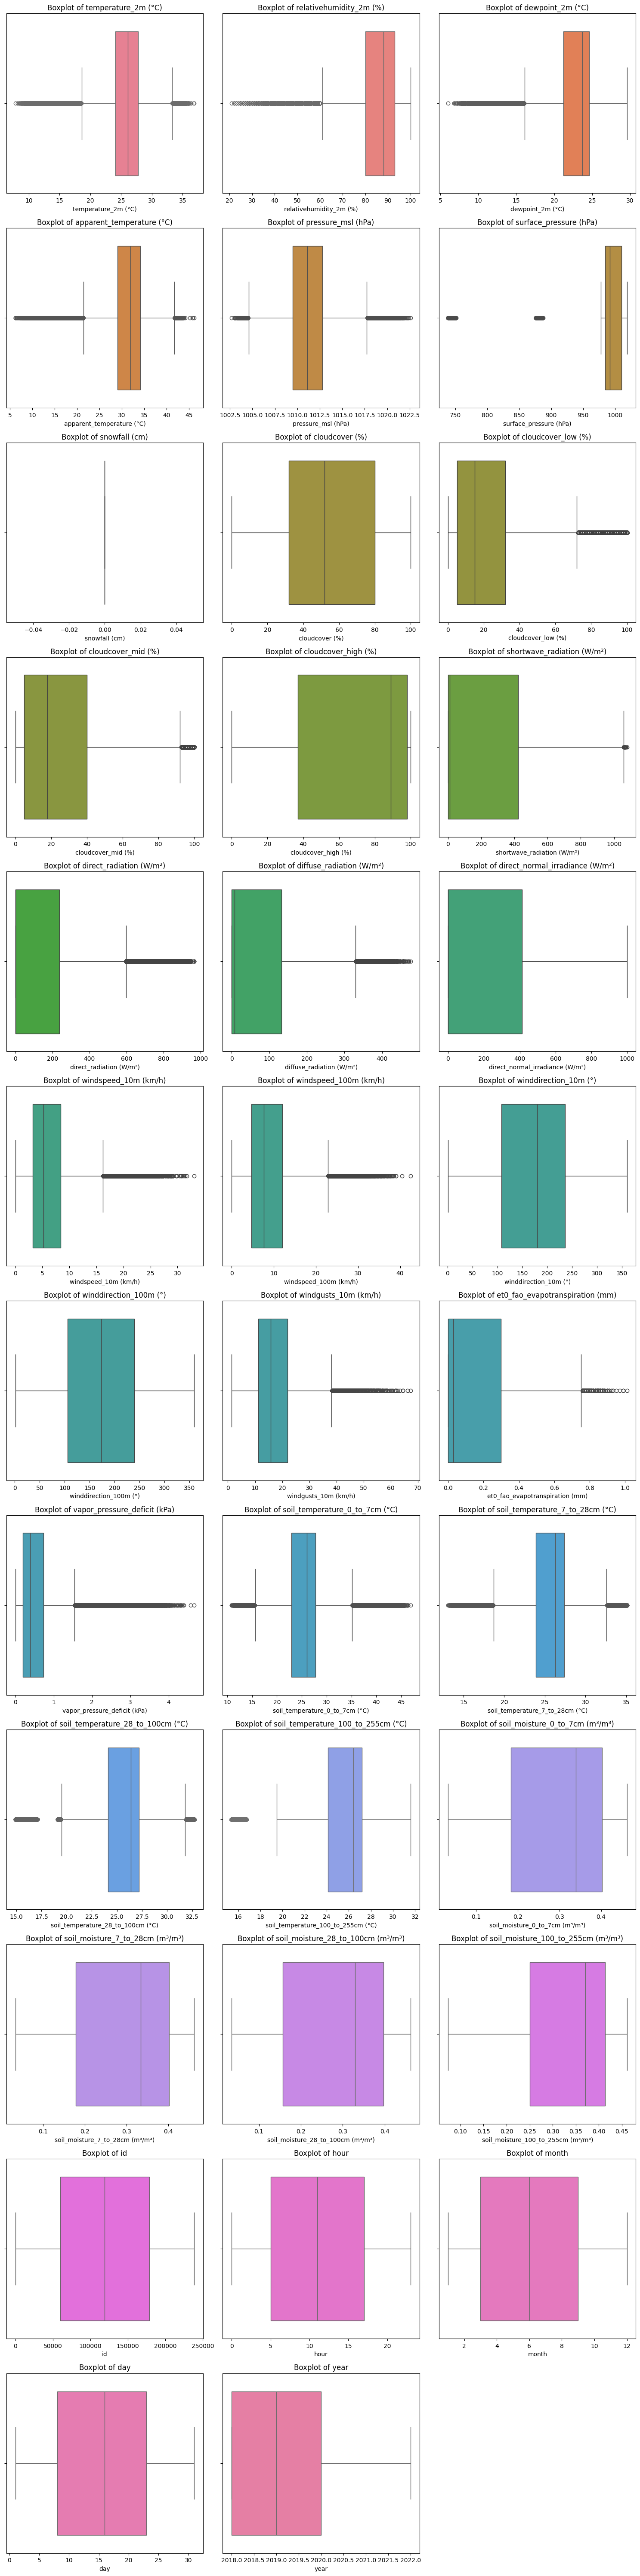

In [24]:
n_cols = 3
n_rows = (len(numeric_col) + n_cols - 1) // n_cols  
palettes = sns.color_palette("husl", len(numeric_col))  
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))
axes = axes.flatten()
for i, x in enumerate(numeric_col):
    sns.boxplot(data=train, x=train[x], ax=axes[i], color=palettes[i])
    axes[i].set_title(f'Boxplot of {x}')

for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

<Axes: xlabel='city', ylabel='count'>

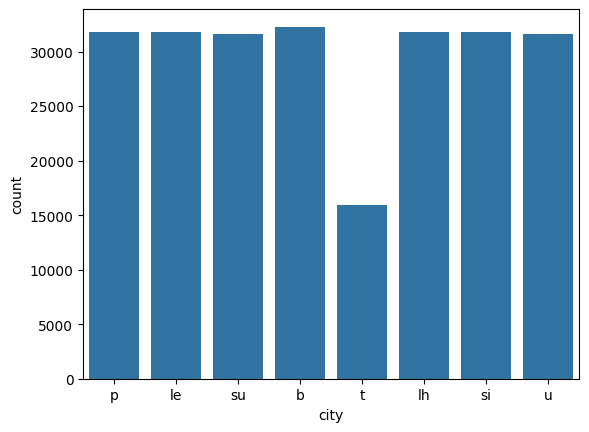

In [25]:
sns.countplot(data=train, x = 'city')

corelation

In [26]:
corr_matrix = train[numeric_col].corr()

In [27]:
corr_matrix['apparent_temperature (°C)'].sort_values(ascending=False)

apparent_temperature (°C)             1.000000
temperature_2m (°C)                   0.964105
surface_pressure (hPa)                0.884295
dewpoint_2m (°C)                      0.882387
soil_temperature_0_to_7cm (°C)        0.861277
soil_temperature_7_to_28cm (°C)       0.837215
soil_temperature_100_to_255cm (°C)    0.834907
soil_temperature_28_to_100cm (°C)     0.833581
vapor_pressure_deficit (kPa)          0.507936
et0_fao_evapotranspiration (mm)       0.397606
direct_normal_irradiance (W/m²)       0.382219
direct_radiation (W/m²)               0.380128
shortwave_radiation (W/m²)            0.364208
windspeed_10m (km/h)                  0.267361
diffuse_radiation (W/m²)              0.225354
windspeed_100m (km/h)                 0.220008
year                                  0.155200
hour                                  0.116075
windgusts_10m (km/h)                  0.071948
winddirection_10m (°)                 0.061979
winddirection_100m (°)                0.016699
day          

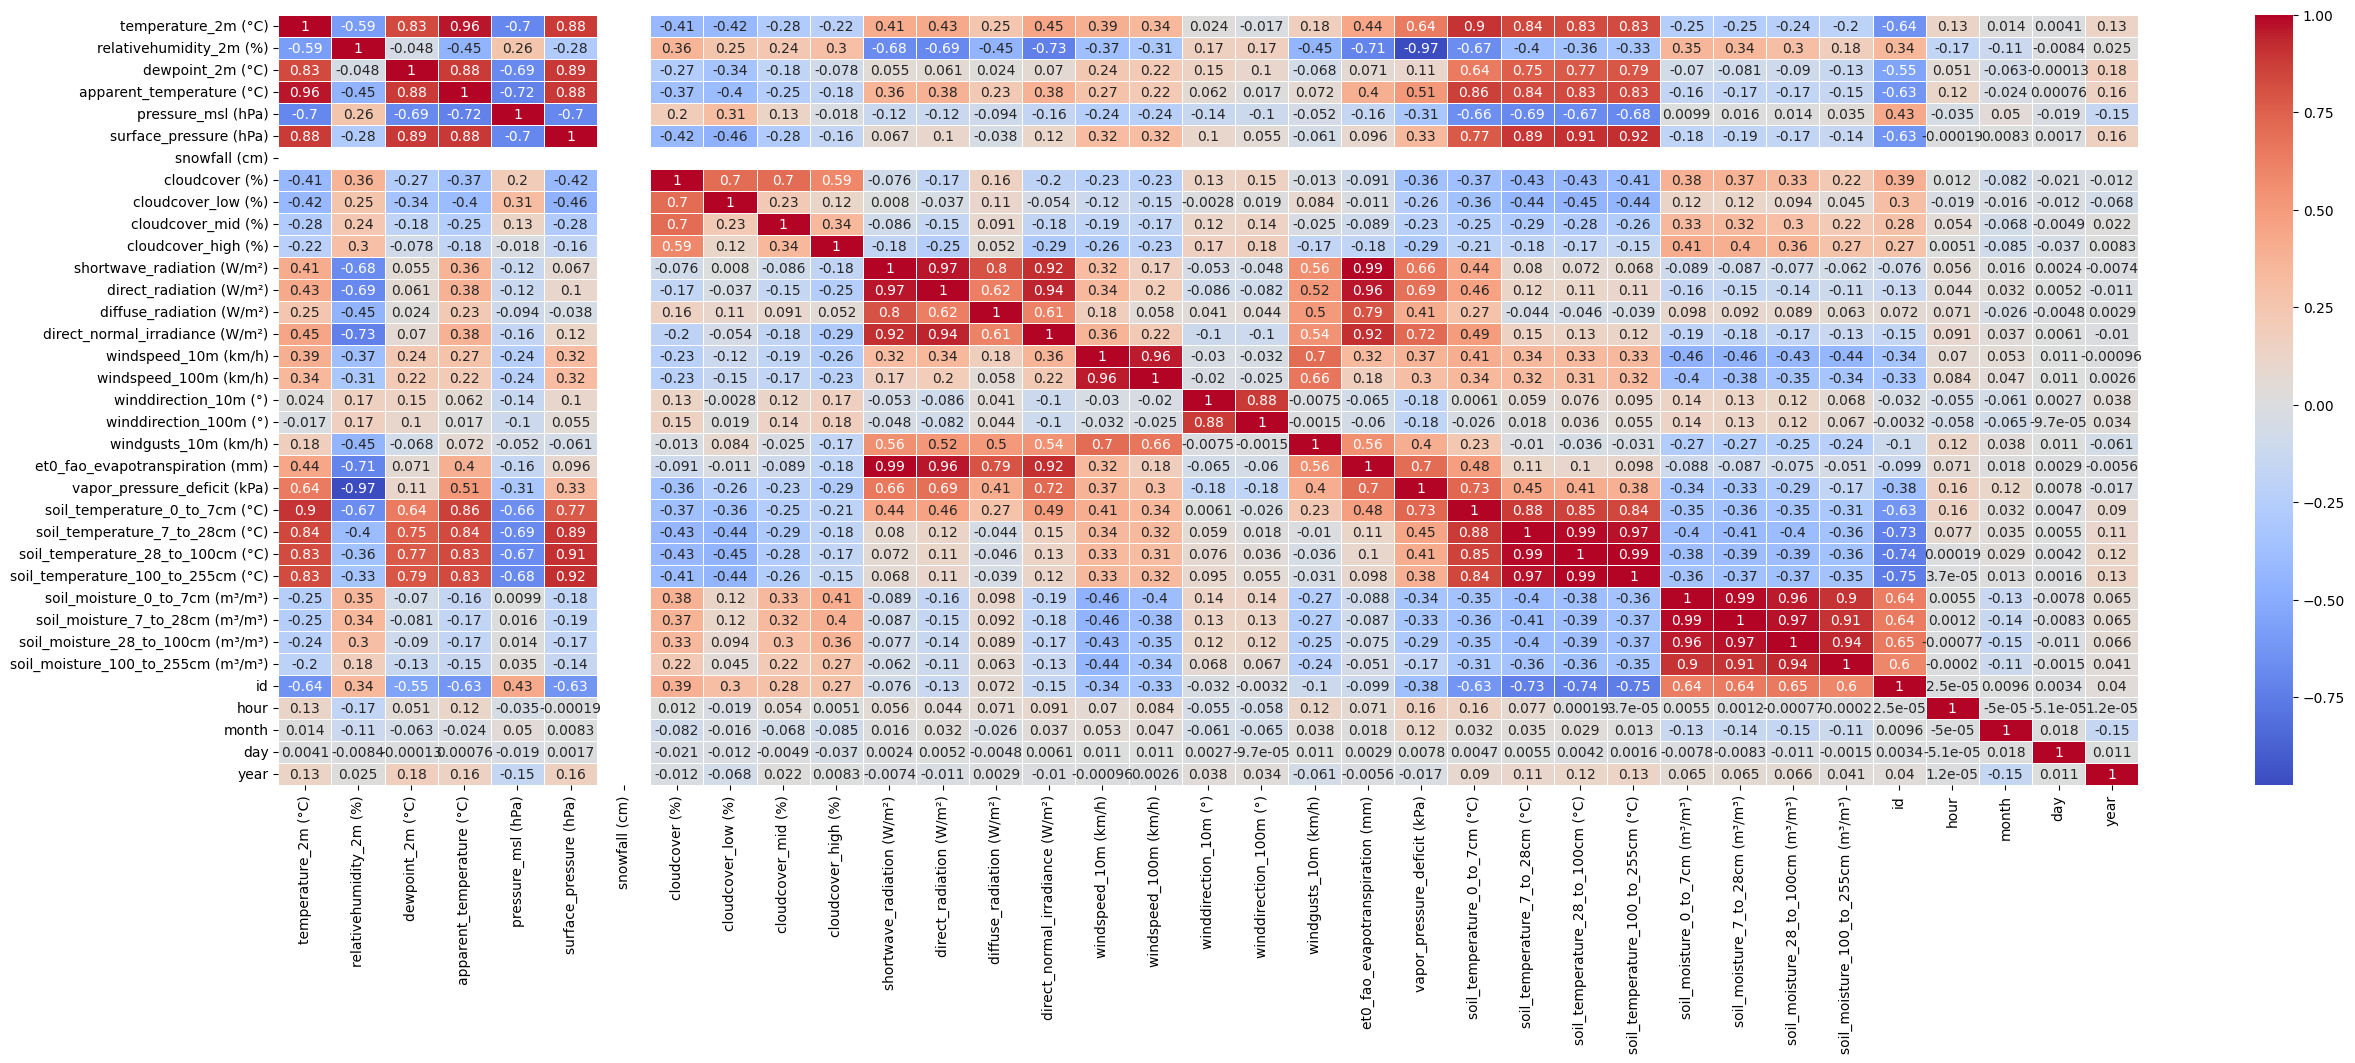

In [28]:
# Create a heatmap
plt.figure(figsize=(30, 10))
sns.heatmap(train[numeric_col].corr(), annot=True, cmap="coolwarm", linewidths=0.5)

# Show the plot
plt.show()

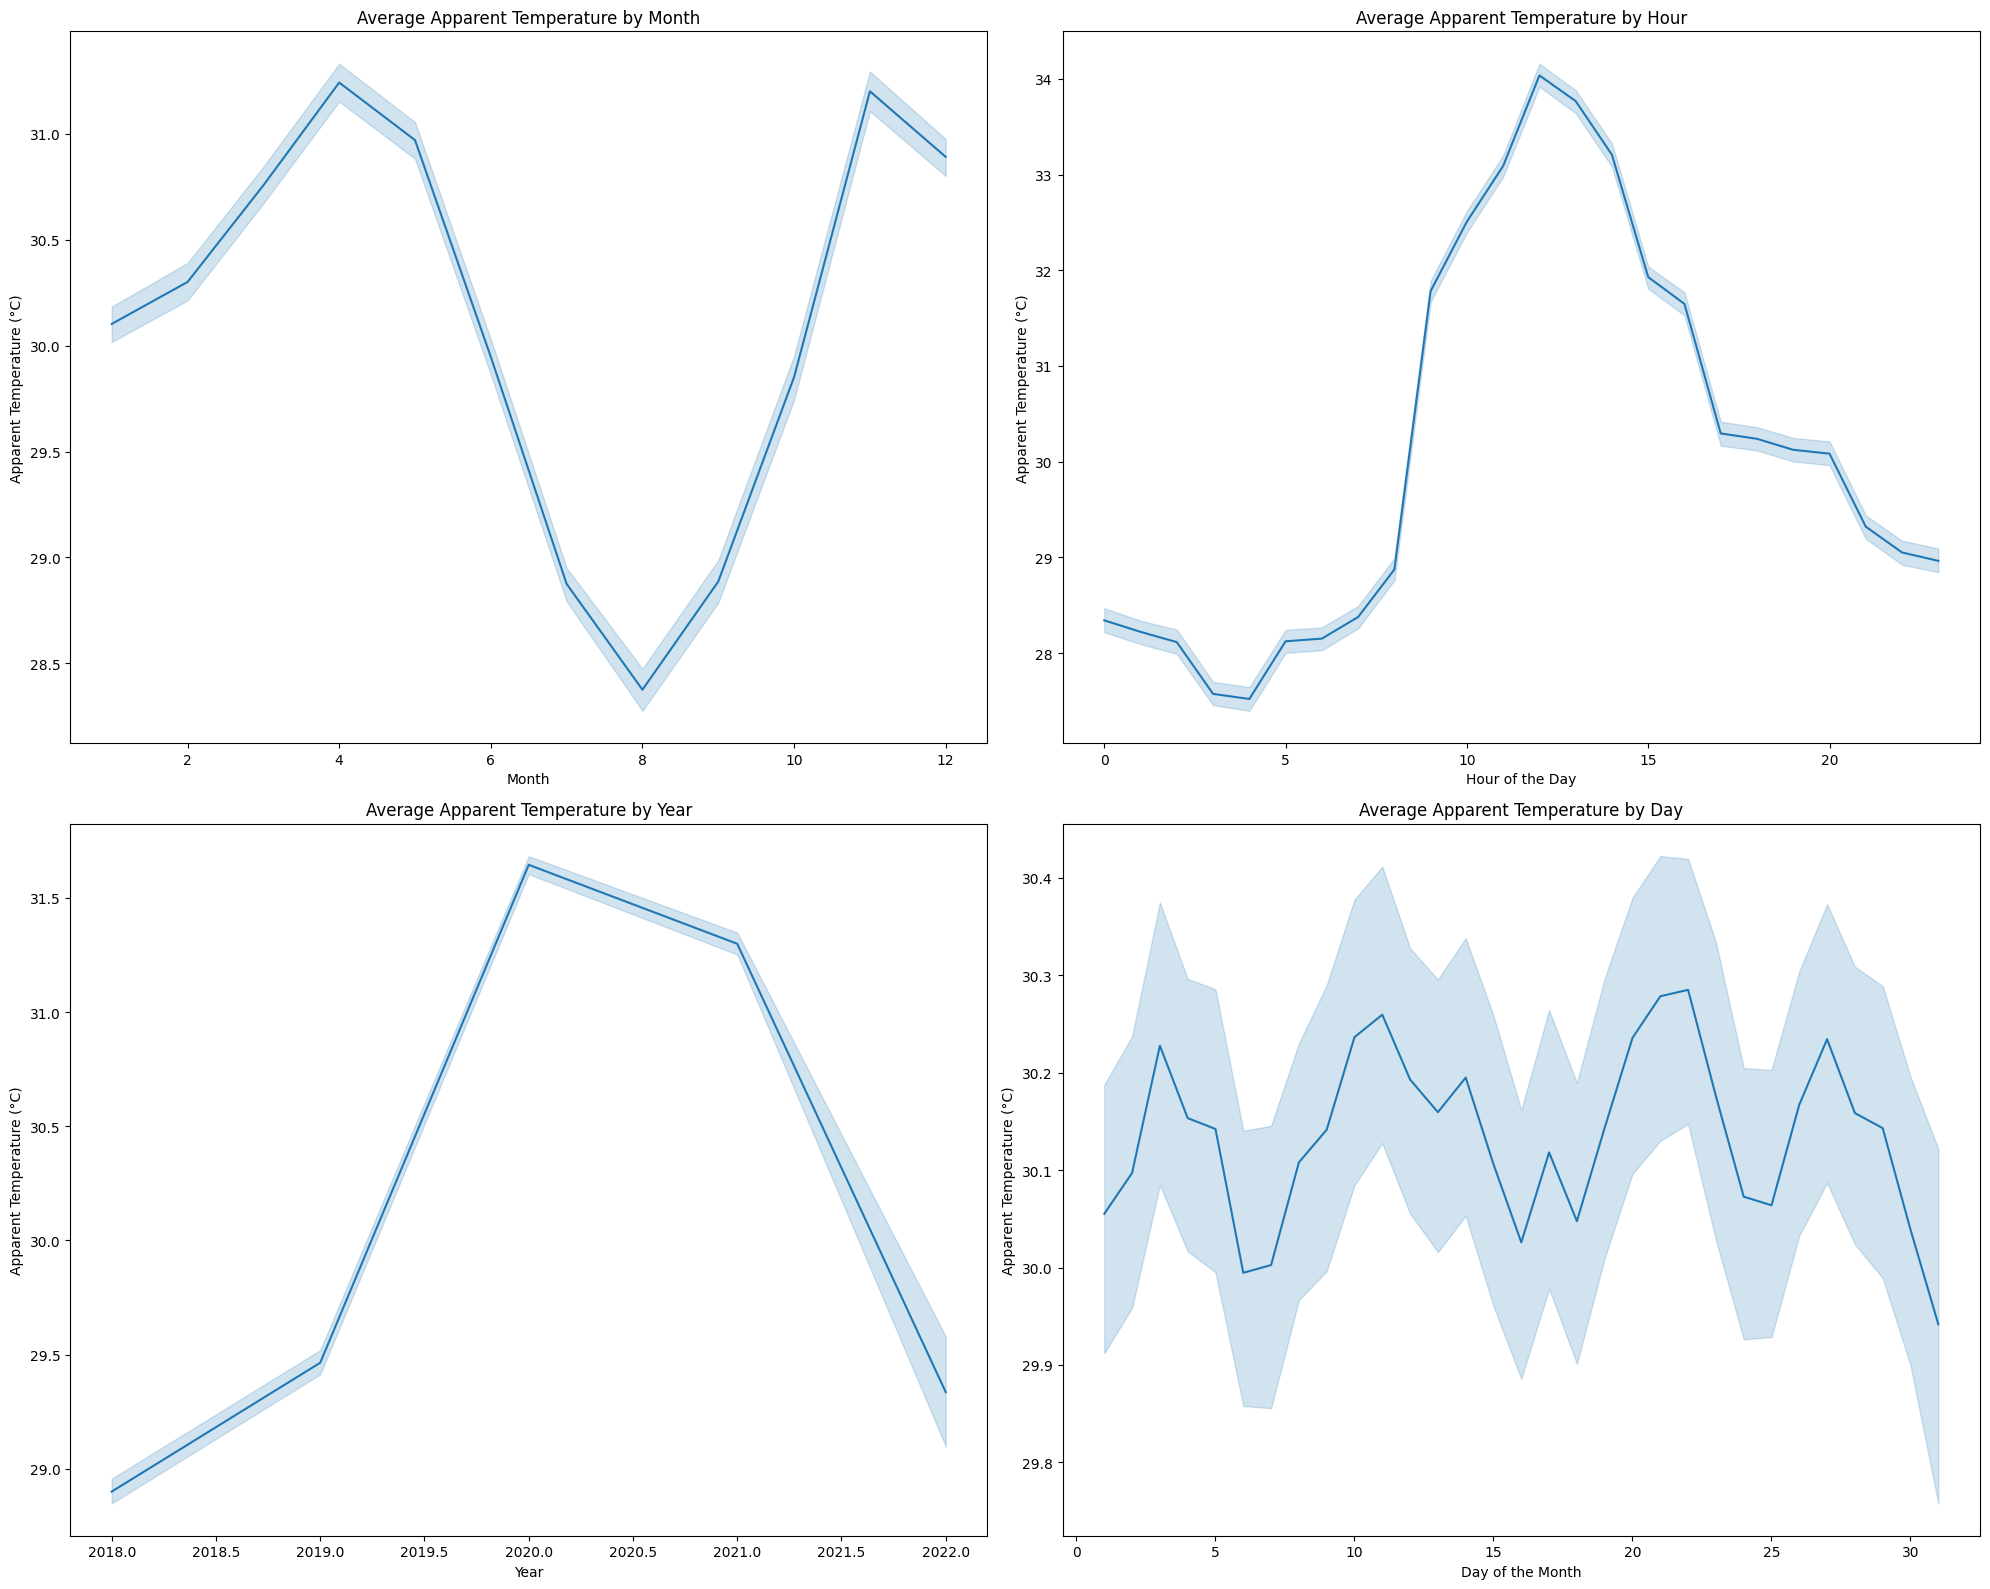

In [29]:
fig, axs = plt.subplots(2, 2, figsize=(20, 16))

# Average apparent temperature by month
sns.lineplot(x=train['month'], y=train['apparent_temperature (°C)'], ax=axs[0, 0])
axs[0, 0].set_title('Average Apparent Temperature by Month')
axs[0, 0].set_xlabel('Month')
axs[0, 0].set_ylabel('Apparent Temperature (°C)')

# Average apparent temperature by hour
sns.lineplot(x=train['hour'], y=train['apparent_temperature (°C)'], ax=axs[0, 1])
axs[0, 1].set_title('Average Apparent Temperature by Hour')
axs[0, 1].set_xlabel('Hour of the Day')
axs[0, 1].set_ylabel('Apparent Temperature (°C)')

# Average apparent temperature by year
sns.lineplot(x=train['year'], y=train['apparent_temperature (°C)'], ax=axs[1, 0])
axs[1, 0].set_title('Average Apparent Temperature by Year')
axs[1, 0].set_xlabel('Year')
axs[1, 0].set_ylabel('Apparent Temperature (°C)')

# Average apparent temperature by day
sns.lineplot(x=train['day'], y=train['apparent_temperature (°C)'], ax=axs[1, 1])
axs[1, 1].set_title('Average Apparent Temperature by Day')
axs[1, 1].set_xlabel('Day of the Month')
axs[1, 1].set_ylabel('Apparent Temperature (°C)')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


Analysis temperature based Time series based on city

In [30]:
train_b = train[train['city'] == 'b']
train_p = train[train['city'] == 'p']
train_le = train[train['city'] == 'le']
train_lh = train[train['city'] == 'lh']
train_si = train[train['city'] == 'si']
train_u = train[train['city'] == 'u']
train_su = train[train['city'] == 'su']
train_t = train[train['city'] == 't']

In [31]:
for city in train['city'].unique():
    df = train[train['city'] == city].set_index('time')
    df = df.sort_index()
    print(city)
    print(df.index.min())
    print(df.index.max())
    print('-----------')


p
2018-01-01 00:00:00
2022-12-28 23:00:00
-----------
le
2018-01-01 00:00:00
2022-12-28 23:00:00
-----------
su
2018-01-01 00:00:00
2022-12-28 23:00:00
-----------
b
2018-01-01 00:00:00
2022-12-28 23:00:00
-----------
t
2018-01-01 00:00:00
2019-10-26 11:00:00
-----------
lh
2018-01-01 00:00:00
2022-12-28 23:00:00
-----------
si
2018-01-01 00:00:00
2022-12-28 23:00:00
-----------
u
2018-01-01 00:00:00
2022-12-28 23:00:00
-----------


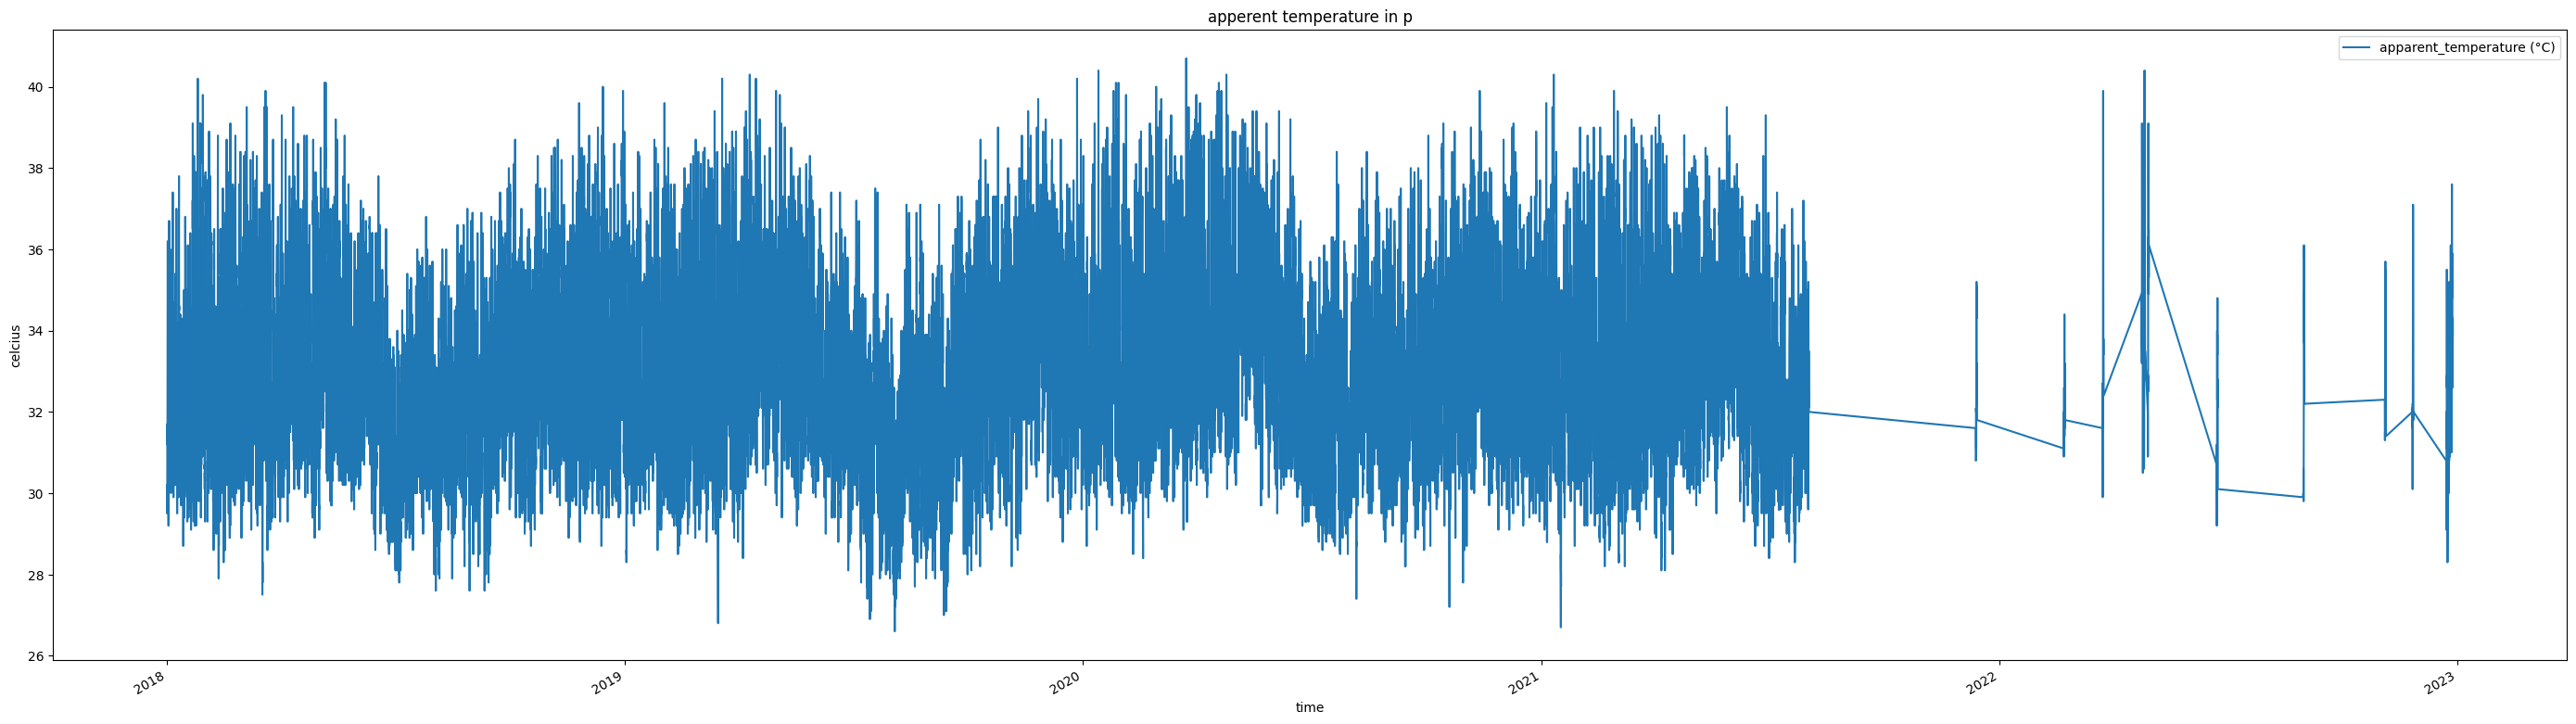

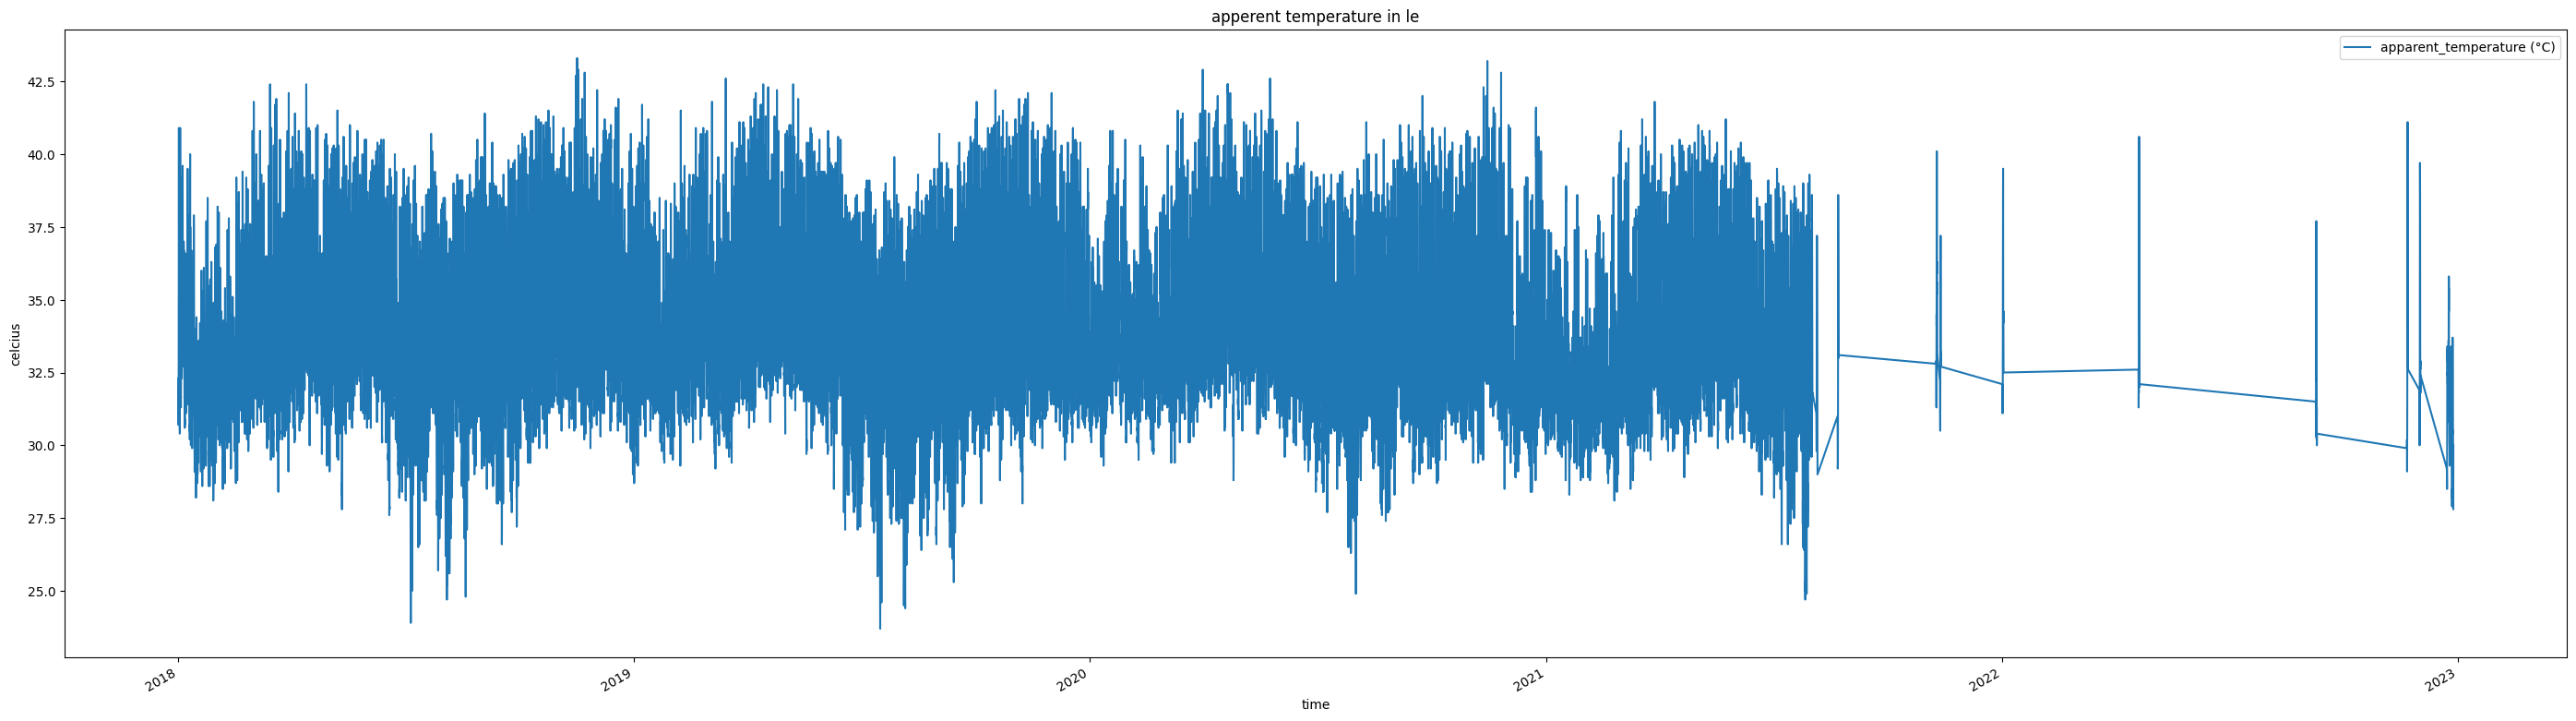

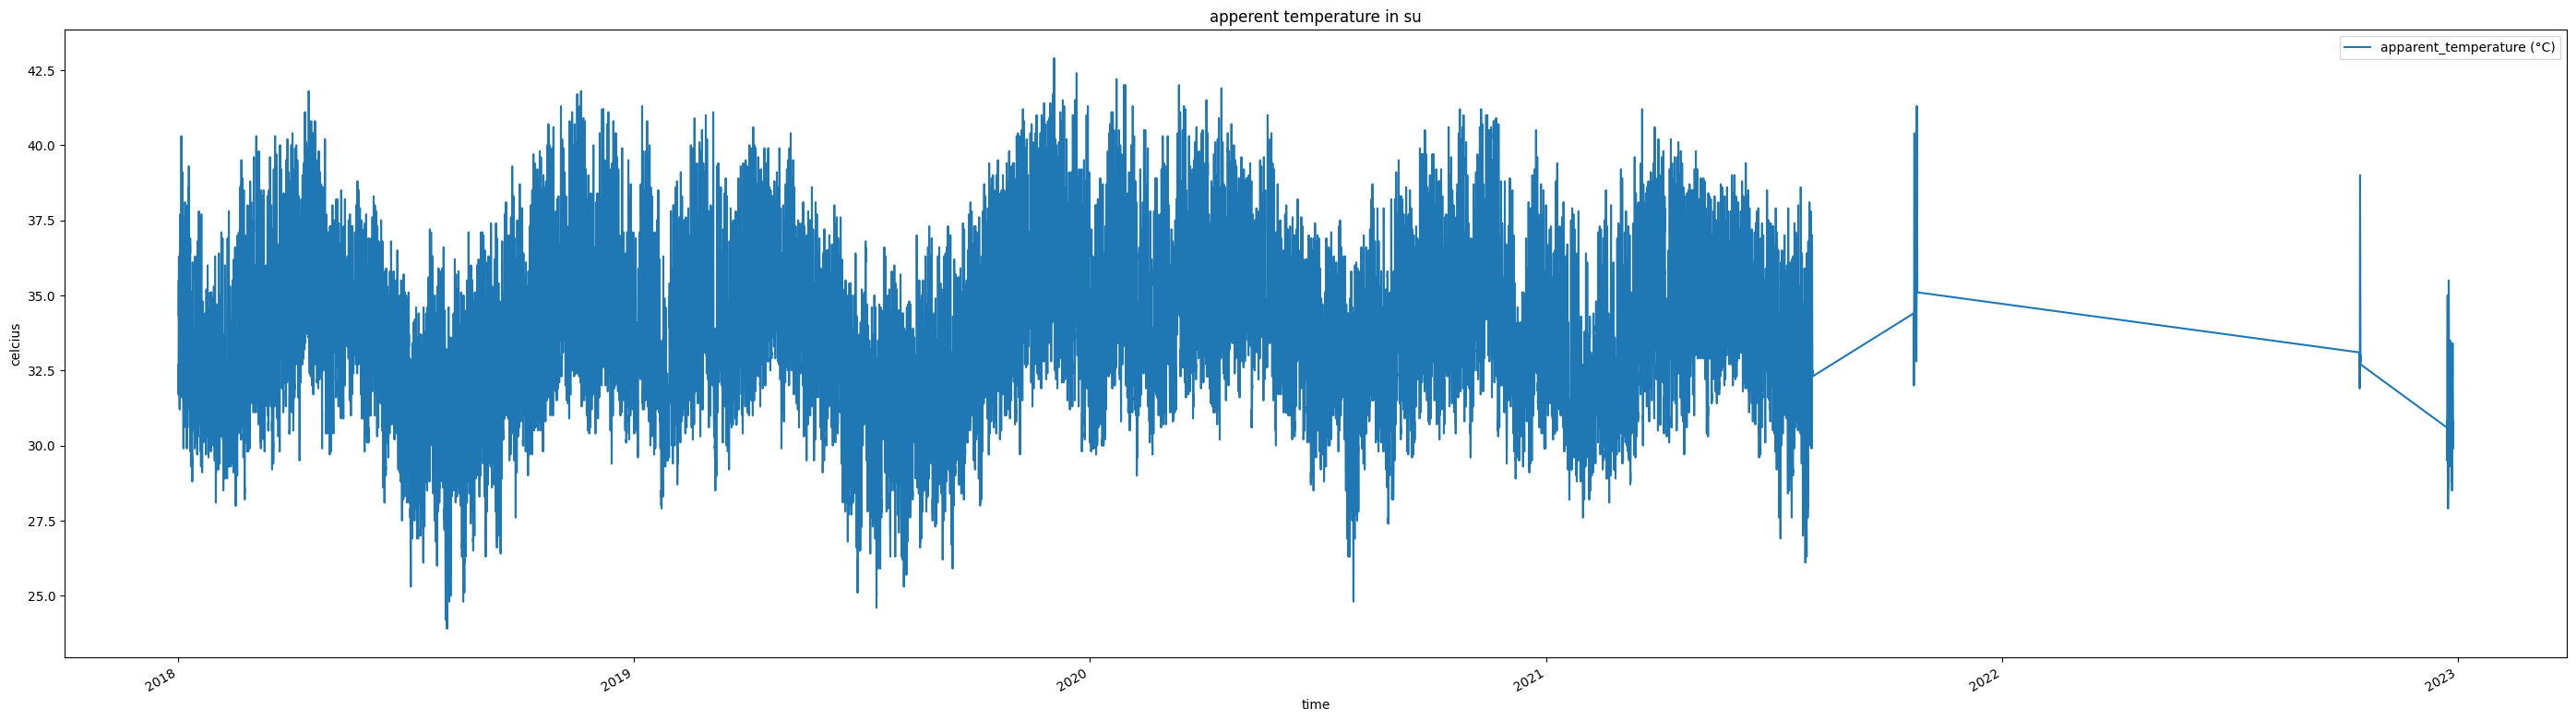

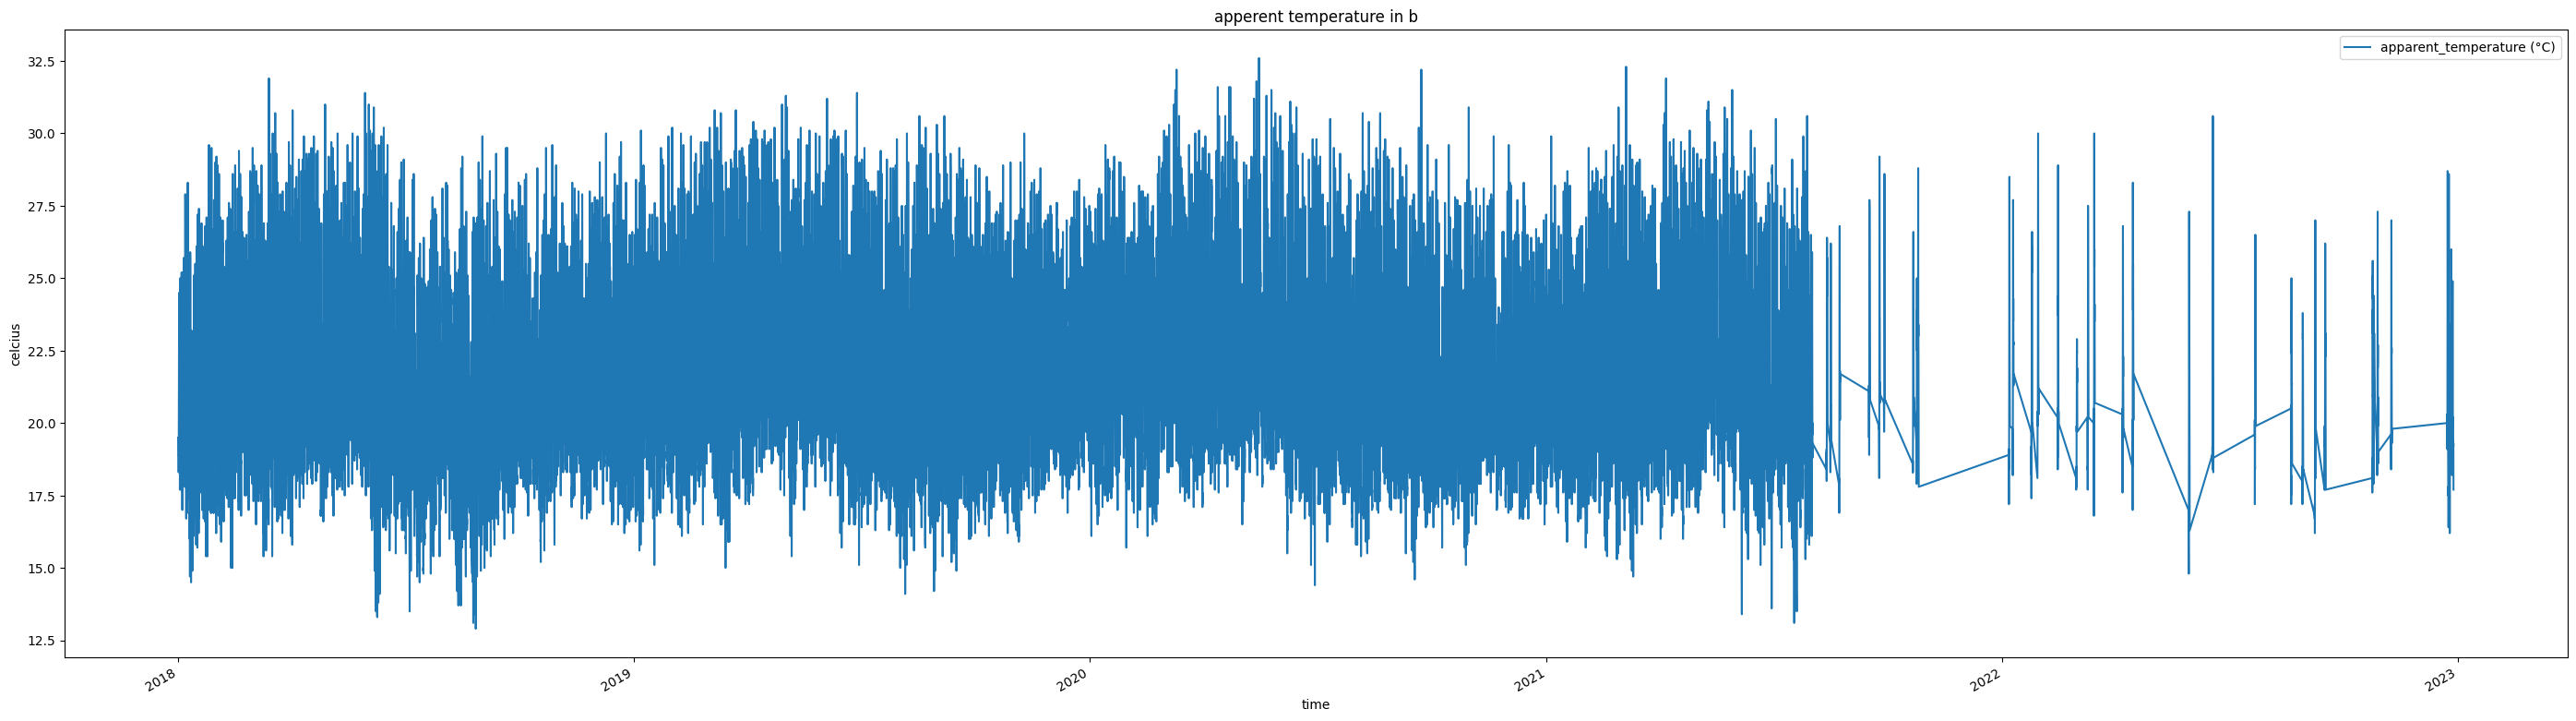

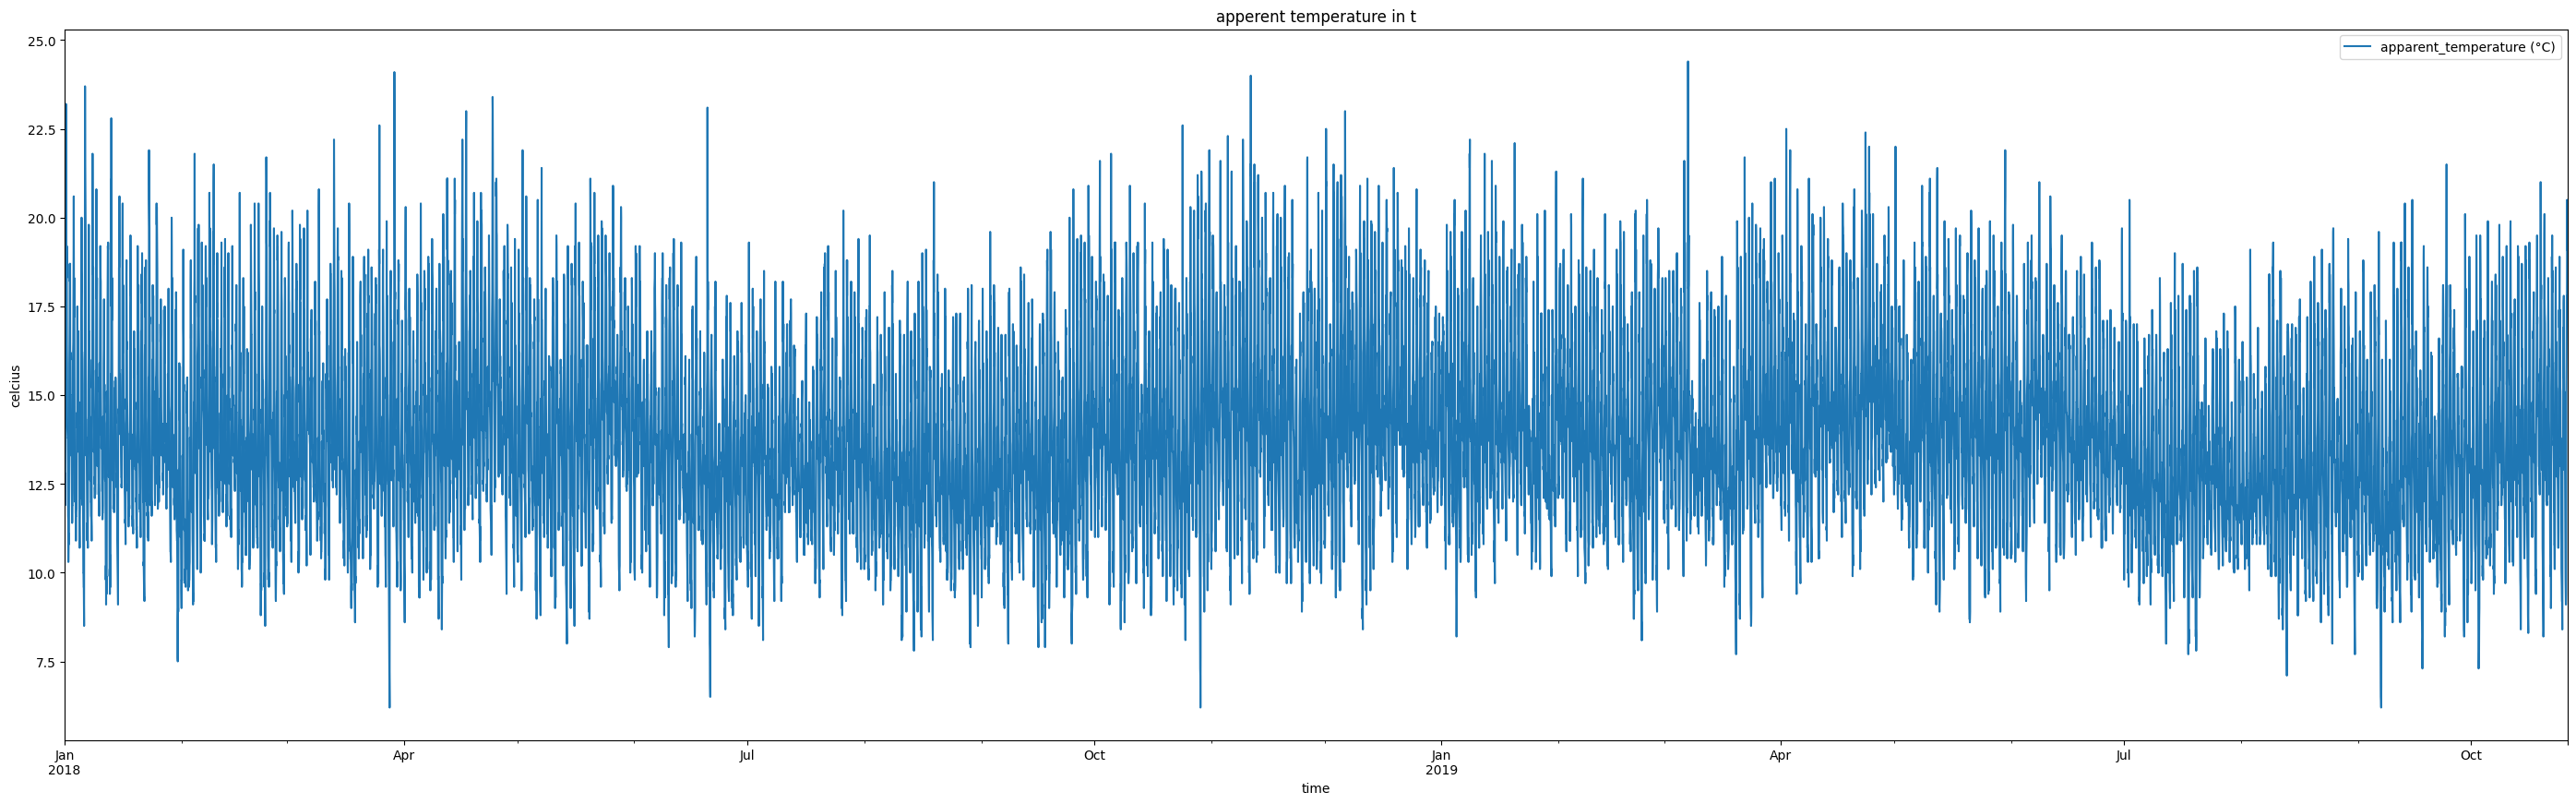

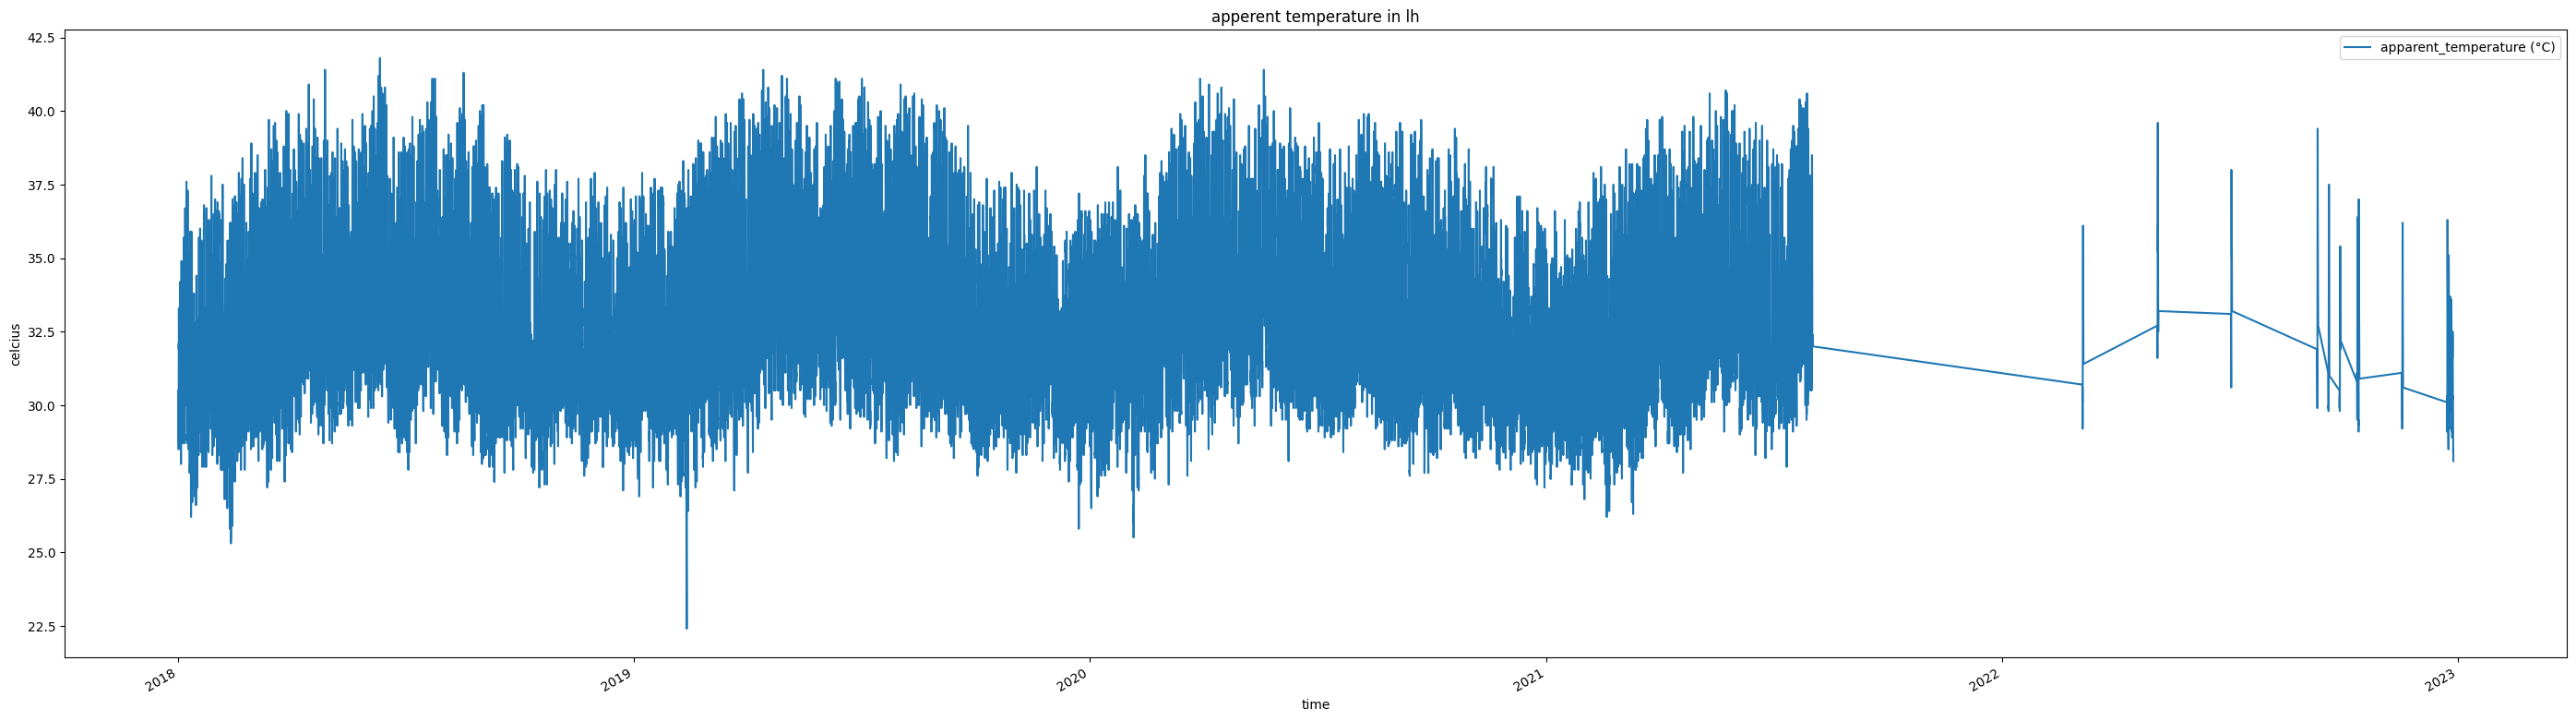

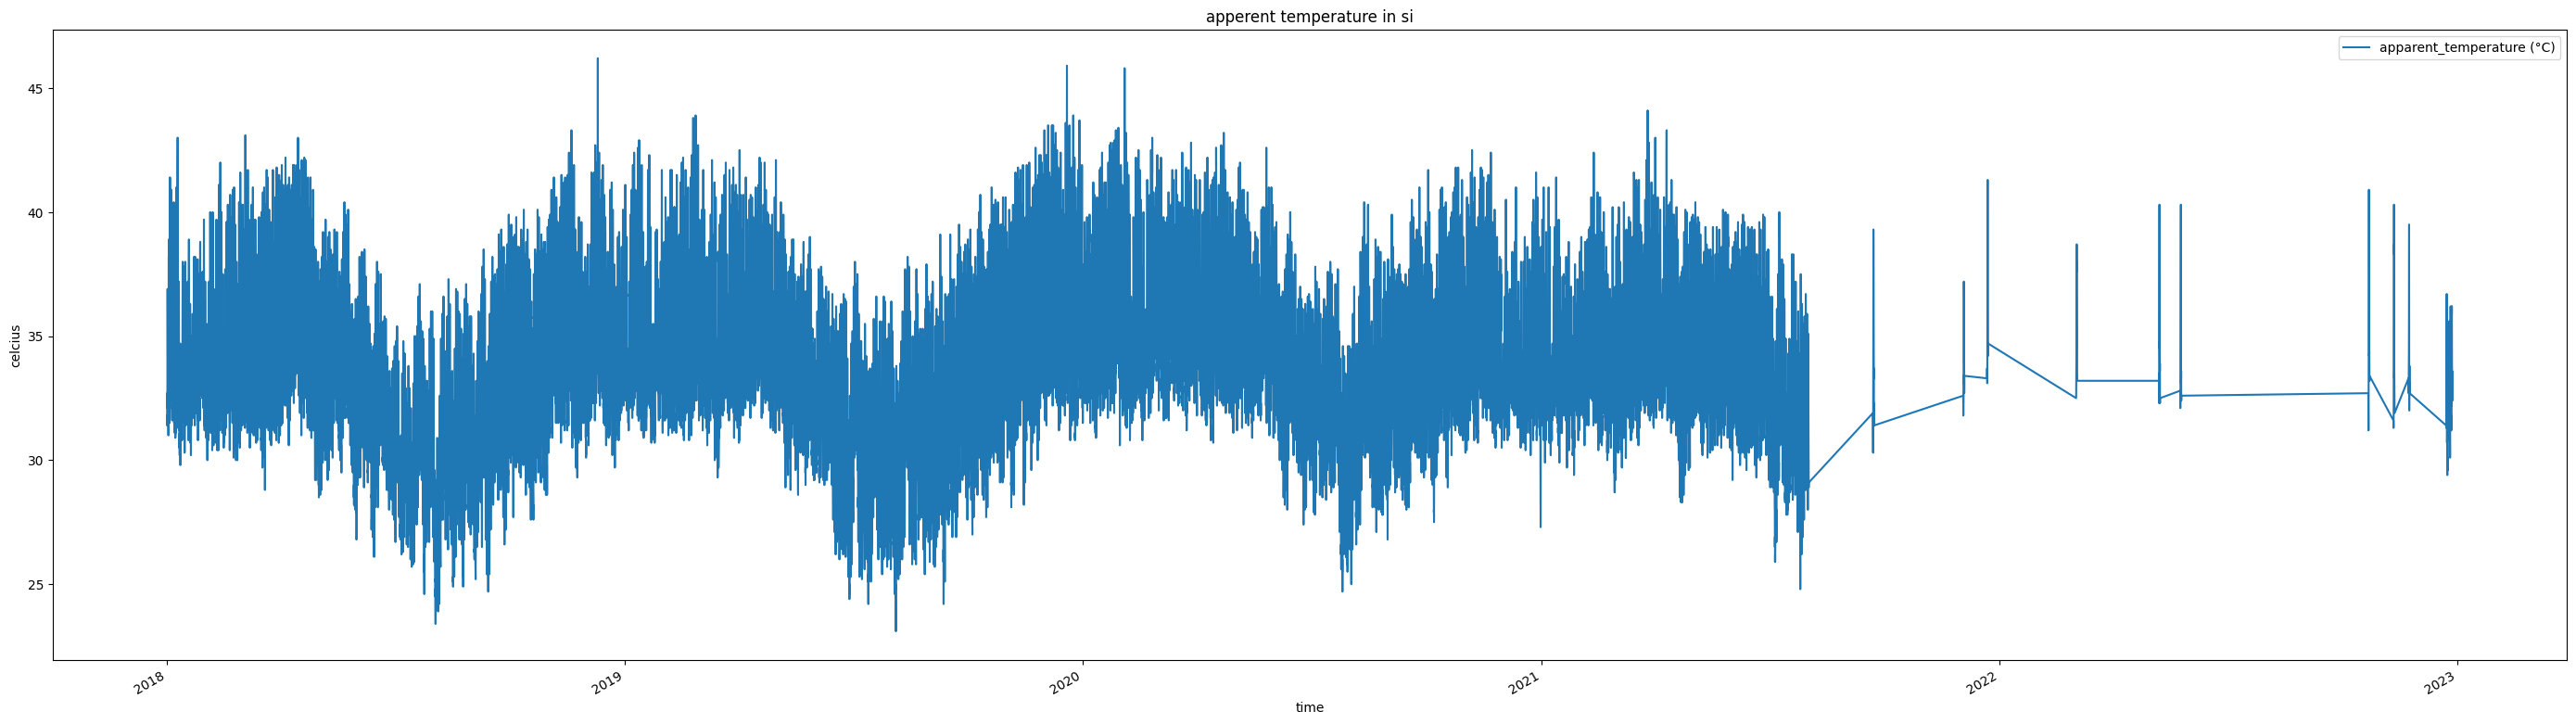

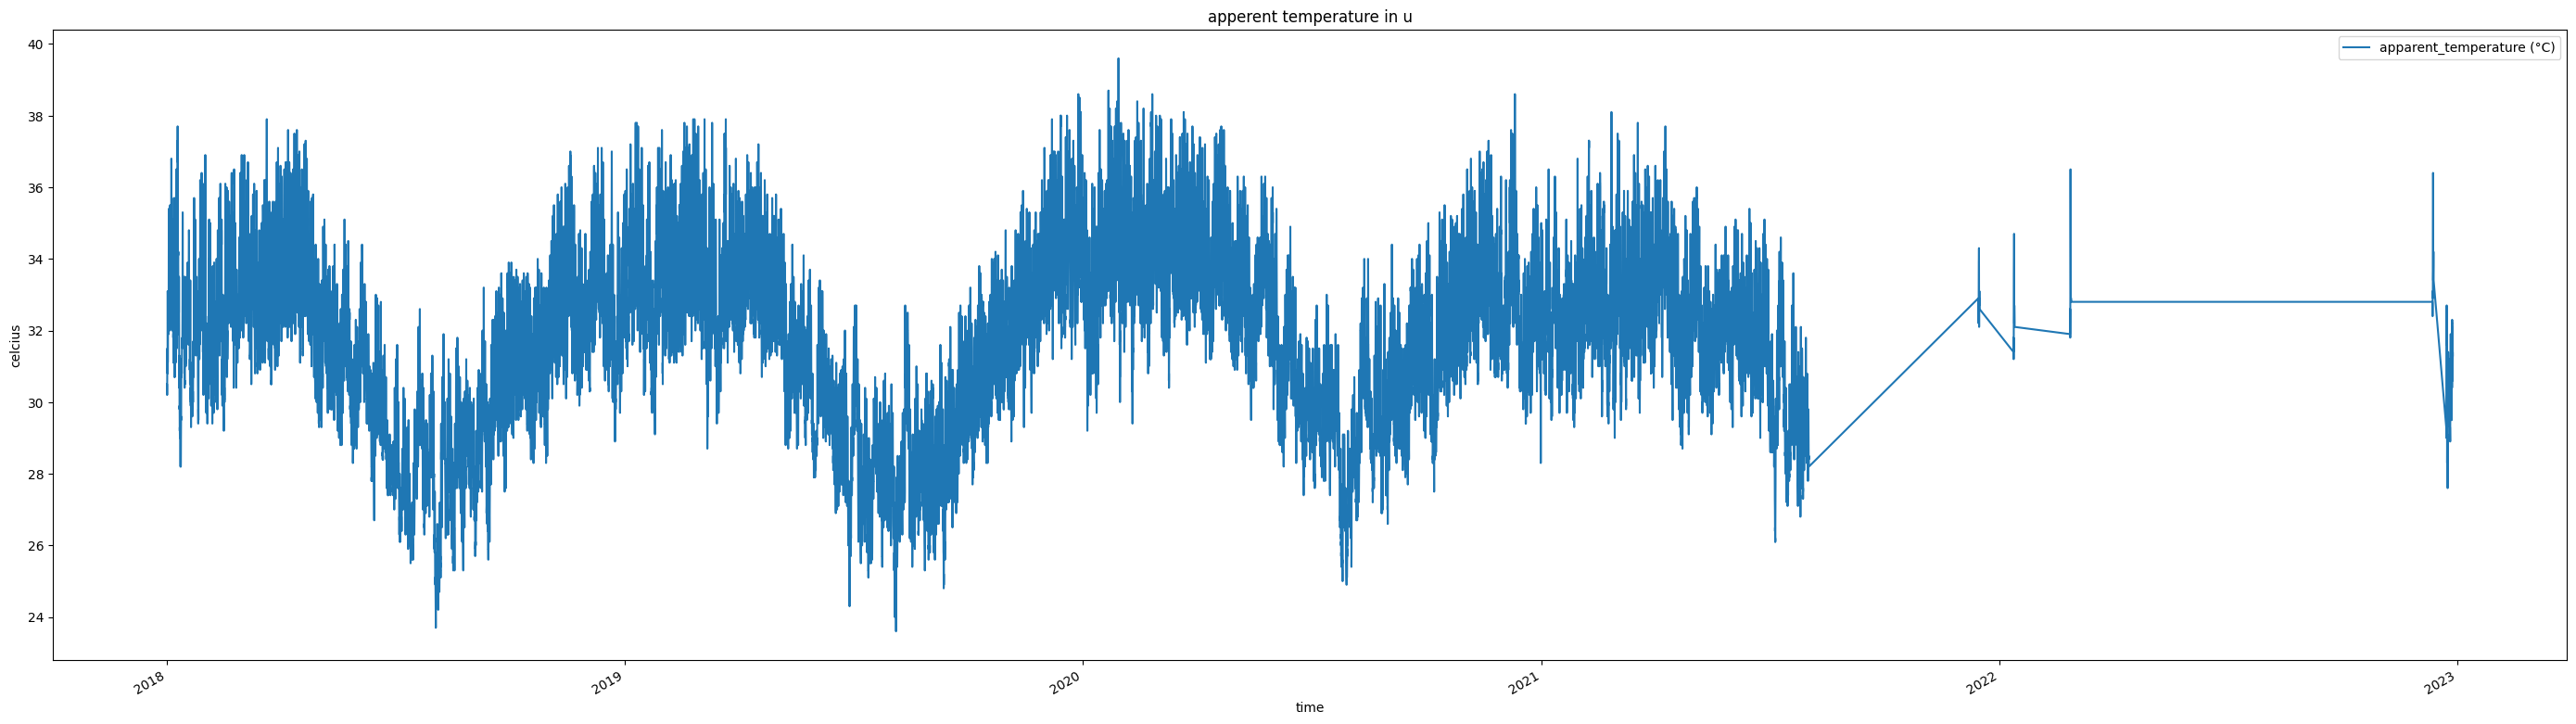

In [32]:
for city in train['city'].unique():
    df = train[train['city'] == city].set_index('time')
    df[["apparent_temperature (°C)"]].plot(style="-", figsize=(35, 10), title=f"apperent temperature in {city}")
    plt.ylabel('celcius')
    plt.show()

# Preprocessing

## Training  data 

In [33]:
le = LabelEncoder()
train['city'] = le.fit_transform(train['city'])
copy_train = train.copy()

In [34]:

# Drop na
train_drop_na = train.dropna()

# Fill median
train_fill_median = copy_train.fillna(copy_train.median())

# Fill mean
train_fill_mean = copy_train.fillna(copy_train.mean())

# fillNA bedasarkan median dari kota nya
train_fill_city = copy_train.copy()

for col in train_fill_city.columns:
    if train_fill_city[col].dtype in ['float64', 'int64']:
        train_fill_city[col] = train_fill_city[col].fillna(train_fill_city.groupby('city')[col].transform('median'))
        
        
# fillNA bedasarkan hour dari kota nya
train_fill_by_hour = copy_train.copy()

for col in train_fill_by_hour.columns:
    if train_fill_by_hour[col].dtype in ['float64', 'int64']:
        train_fill_by_hour[col] = train_fill_by_hour[col].fillna(
            train_fill_by_hour.groupby(['city', 'hour'])[col].transform('median'))
        

# Forward Fill  Backward Fill ?
# mice
        

## Modeling

In [35]:
high_corr_target = ['temperature_2m (°C)',
 'surface_pressure (hPa)',
 'dewpoint_2m (°C)',
 'soil_temperature_0_to_7cm (°C)',
 'soil_temperature_7_to_28cm (°C)',
 'soil_temperature_100_to_255cm (°C)',
 'soil_temperature_28_to_100cm (°C)',
 'pressure_msl (hPa)', 'apparent_temperature (°C)'
]

In [36]:
def trainModelXGB(df,col):
    scaler = MinMaxScaler()
    df[col] = scaler.fit_transform(df[col])
    df_x = df[col].drop(columns=[TARGET])
    df_y = df[TARGET]
    
    X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.25, random_state=42)

    xgbr = XGBRegressor()
    xgbr.fit(X_train, y_train)
    y_pred_rf = xgbr.predict(X_test)
    mse = root_mean_squared_error(y_test, y_pred_rf)
    rmse = mean_squared_error(y_test, y_pred_rf)
    print(f"root Mean Squared Error: {mse}")
    print(f" Mean Squared Error: {rmse}")
    
    return xgbr

In [37]:
# Drop col
model_drop = trainModelXGB(train_drop_na, high_corr_target)

root Mean Squared Error: 0.021406872567765137
 Mean Squared Error: 0.0004582541931325356


In [38]:
# Fill with median city
trainModelXGB(train_fill_city, high_corr_target)

root Mean Squared Error: 0.021366706972013122
 Mean Squared Error: 0.00045653616682787417


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [39]:
# Fill mean
trainModelXGB(train_fill_mean, high_corr_target)

root Mean Squared Error: 0.021300559240467195
 Mean Squared Error: 0.00045371382395665243


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [40]:
# fill mean
trainModelXGB(train_fill_median, high_corr_target)

root Mean Squared Error: 0.021258111756924433
 Mean Squared Error: 0.00045190731546988875


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [41]:
# fill by hour
trainModelXGB(train_fill_by_hour, high_corr_target)

root Mean Squared Error: 0.021377972802782395
 Mean Squared Error: 0.0004570177211565037


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

## Make model based on city


In [42]:
for city in train['city'].unique():
    print('--------')
    print('city:',city)
    trainModelXGB(train_drop_na[train_fill_by_hour['city'] == city], high_corr_target)

--------
city: 3
root Mean Squared Error: 0.03291604403877257
 Mean Squared Error: 0.001083465955162415
--------
city: 1
root Mean Squared Error: 0.04542283045303895
 Mean Squared Error: 0.0020632335263655226
--------
city: 5
root Mean Squared Error: 0.04578114970570209
 Mean Squared Error: 0.0020959136683759063
--------
city: 0
root Mean Squared Error: 0.02499353209634571
 Mean Squared Error: 0.0006246766466510633
--------
city: 6
root Mean Squared Error: 0.018690703941135364
 Mean Squared Error: 0.00034934241381517304
--------
city: 2
root Mean Squared Error: 0.045123225978974106
 Mean Squared Error: 0.002036105522749564
--------
city: 4
root Mean Squared Error: 0.04035263112190252
 Mean Squared Error: 0.001628334838460336
--------
city: 7
root Mean Squared Error: 0.03435331672842998
 Mean Squared Error: 0.001180150370243827


In [43]:
city_6 = trainModelXGB(train_drop_na[train_drop_na['city'] == 6], high_corr_target)

root Mean Squared Error: 0.018690703941135364
 Mean Squared Error: 0.00034934241381517304


In [44]:
le.inverse_transform(train['city'])[4]

't'

# Test Data

In [45]:
test['time'] = pd.to_datetime(test['time'])
test['hour'] = test['time'].dt.hour
test['month'] = test['time'].dt.month
test['day'] = test['time'].dt.day
test['year'] = test['time'].dt.year
test.sort_values('time', inplace=True)
# test.set_index('time', inplace=True)

In [46]:
test.shape

(79548, 36)

In [47]:
test.isnull().sum()

time                                    0
temperature_2m (°C)                    51
relativehumidity_2m (%)                51
dewpoint_2m (°C)                       51
pressure_msl (hPa)                     51
surface_pressure (hPa)                 51
snowfall (cm)                          51
cloudcover (%)                         51
cloudcover_low (%)                     51
cloudcover_mid (%)                     51
cloudcover_high (%)                    51
shortwave_radiation (W/m²)             51
direct_radiation (W/m²)                51
diffuse_radiation (W/m²)               51
direct_normal_irradiance (W/m²)        48
windspeed_10m (km/h)                   51
windspeed_100m (km/h)                  51
winddirection_10m (°)                 151
winddirection_100m (°)                 87
windgusts_10m (km/h)                   51
et0_fao_evapotranspiration (mm)        51
vapor_pressure_deficit (kPa)           51
soil_temperature_0_to_7cm (°C)         51
soil_temperature_7_to_28cm (°C)   

In [48]:
print(test[test['temperature_2m (°C)'].isnull() ==True].value_counts('year').sort_index(), "\n")
print(test[test['temperature_2m (°C)'].isnull() ==True].value_counts('month').sort_values(),"\n")
print(test[test['temperature_2m (°C)'].isnull() ==True].value_counts('day').sort_values(),"\n")
print(test[test['temperature_2m (°C)'].isnull() ==True].value_counts('hour').sort_index(),"\n")
print(test[test['temperature_2m (°C)'].isnull() ==True].value_counts('city').sort_values(),"\n")

year
2022    51
Name: count, dtype: int64 

month
12    51
Name: count, dtype: int64 

day
28    51
Name: count, dtype: int64 

hour
7     3
8     3
9     3
10    3
11    3
12    3
13    3
14    3
15    3
16    3
17    3
18    3
19    3
20    3
21    3
22    3
23    3
Name: count, dtype: int64 

city
q     17
sa    17
t     17
Name: count, dtype: int64 



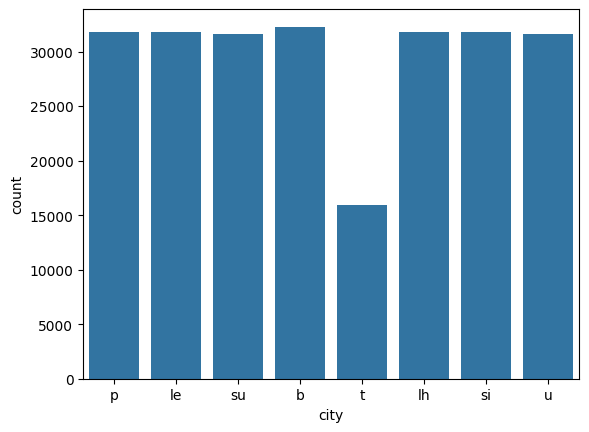

In [49]:
test.tail(5)

time  temperature_2m (°C)  relativehumidity_2m (%)  dewpoint_2m (°C)  pressure_msl (hPa)  surface_pressure (hPa)  snowfall (cm)  cloudcover (%)  cloudcover_low (%)  cloudcover_mid (%)  cloudcover_high (%)  shortwave_radiation (W/m²)  direct_radiation (W/m²)  diffuse_radiation (W/m²)  direct_normal_irradiance (W/m²)  windspeed_10m (km/h)  windspeed_100m (km/h)  winddirection_10m (°)  winddirection_100m (°)  windgusts_10m (km/h)  et0_fao_evapotranspiration (mm)  vapor_pressure_deficit (kPa)  soil_temperature_0_to_7cm (°C)  soil_temperature_7_to_28cm (°C)  soil_temperature_28_to_100cm (°C)  soil_temperature_100_to_255cm (°C)  soil_moisture_0_to_7cm (m³/m³)  soil_moisture_7_to_28cm (m³/m³)  soil_moisture_28_to_100cm (m³/m³)  soil_moisture_100_to_255cm (m³/m³) city      id  hour  month  day  year
4599  2022-12-28 22:00:00                  NaN                      NaN               NaN                 NaN                     NaN            NaN             NaN                 NaN                 NaN                  NaN                         NaN                      NaN                       NaN                              NaN                   NaN                    NaN                    NaN                     NaN                   NaN                              NaN                           NaN                             NaN                              NaN                                NaN                                 NaN                             NaN                              NaN                                NaN                                 NaN   sa  286582    22     12   28  2022
74814 2022-12-28 22:00:00                  NaN                      NaN               NaN                 NaN                     NaN            NaN             NaN                 NaN                 NaN                  NaN                         NaN                      NaN                       NaN                              NaN                   NaN                    NaN                    NaN                     NaN                   NaN                              NaN                           NaN                             NaN                              NaN                                NaN                                 NaN                             NaN                              NaN                                NaN                                 NaN    t  254950    22     12   28  2022
26749 2022-12-28 23:00:00                  NaN                      NaN               NaN                 NaN                     NaN            NaN             NaN                 NaN                 NaN                  NaN                         NaN                      NaN                       NaN                              NaN                   NaN                    NaN                    NaN                     NaN                   NaN                              NaN                           NaN                             NaN                              NaN                                NaN                                 NaN                             NaN                              NaN                                NaN                                 NaN   sa  286583    23     12   28  2022
59950 2022-12-28 23:00:00                  NaN                      NaN               NaN                 NaN                     NaN            NaN             NaN                 NaN                 NaN                  NaN                         NaN                      NaN                       NaN                              NaN                   NaN                    NaN                    NaN                     NaN                   NaN                              NaN                           NaN                             NaN                              NaN                                NaN                                 NaN                             NaN                              NaN          

In [50]:
test[test['dewpoint_2m (°C)'].isnull() == True].head()

time  temperature_2m (°C)  relativehumidity_2m (%)  dewpoint_2m (°C)  pressure_msl (hPa)  surface_pressure (hPa)  snowfall (cm)  cloudcover (%)  cloudcover_low (%)  cloudcover_mid (%)  cloudcover_high (%)  shortwave_radiation (W/m²)  direct_radiation (W/m²)  diffuse_radiation (W/m²)  direct_normal_irradiance (W/m²)  windspeed_10m (km/h)  windspeed_100m (km/h)  winddirection_10m (°)  winddirection_100m (°)  windgusts_10m (km/h)  et0_fao_evapotranspiration (mm)  vapor_pressure_deficit (kPa)  soil_temperature_0_to_7cm (°C)  soil_temperature_7_to_28cm (°C)  soil_temperature_28_to_100cm (°C)  soil_temperature_100_to_255cm (°C)  soil_moisture_0_to_7cm (m³/m³)  soil_moisture_7_to_28cm (m³/m³)  soil_moisture_28_to_100cm (m³/m³)  soil_moisture_100_to_255cm (m³/m³) city      id  hour  month  day  year
17751 2022-12-28 07:00:00                  NaN                      NaN               NaN                 NaN                     NaN            NaN             NaN                 NaN                 NaN                  NaN                         NaN                      NaN                       NaN                            202.0                   NaN                    NaN                    NaN                     NaN                   NaN                              NaN                           NaN                             NaN                              NaN                                NaN                                 NaN                             NaN                              NaN                                NaN                                 NaN    t  254935     7     12   28  2022
70073 2022-12-28 07:00:00                  NaN                      NaN               NaN                 NaN                     NaN            NaN             NaN                 NaN                 NaN                  NaN                         NaN                      NaN                       NaN                             56.9                   NaN                    NaN                    NaN                     NaN                   NaN                              NaN                           NaN                             NaN                              NaN                                NaN                                 NaN                             NaN                              NaN                                NaN                                 NaN   sa  286567     7     12   28  2022
59488 2022-12-28 07:00:00                  NaN                      NaN               NaN                 NaN                     NaN            NaN             NaN                 NaN                 NaN                  NaN                         NaN                      NaN                       NaN                              0.0                   NaN                    NaN                    NaN                     NaN                   NaN                              NaN                           NaN                             NaN                              NaN                                NaN                                 NaN                             NaN                              NaN                                NaN                                 NaN    q  318175     7     12   28  2022
20794 2022-12-28 08:00:00                  NaN                      NaN               NaN                 NaN                     NaN            NaN             NaN                 NaN                 NaN                  NaN                         NaN                      NaN                       NaN                              NaN                   NaN                    NaN                    NaN                     NaN                   NaN                              NaN                           NaN                             NaN                              NaN                                NaN                                 NaN                             NaN                              NaN          

# Submit

In [51]:
high_corr_target = ['temperature_2m (°C)',
 'surface_pressure (hPa)',
 'dewpoint_2m (°C)',
 'soil_temperature_0_to_7cm (°C)',
 'soil_temperature_7_to_28cm (°C)',
 'soil_temperature_100_to_255cm (°C)',
 'soil_temperature_28_to_100cm (°C)',
 'pressure_msl (hPa)']

In [52]:
le = LabelEncoder()
test['city'] = le.fit_transform(test['city'])

In [53]:
test_fill_by_hour = test.copy()
test = test[high_corr_target]

In [54]:
scaler = MinMaxScaler()

test[high_corr_target] = scaler.fit_transform(test[high_corr_target])

In [55]:
predict = model_drop.predict(test)
submission[TARGET] = predict

submission.to_csv('submission/Scalling_High_cor_col.csv', index=False)

In [56]:
predict = city_6.predict(test)
submission[TARGET] = predict

submission.to_csv('submission/Use_city_6.csv', index=False)

In [57]:
for col in test_fill_by_hour.columns:
    if test_fill_by_hour[col].dtype in ['float64', 'int64']:
        test_fill_by_hour[col] = test_fill_by_hour[col].fillna(
            test_fill_by_hour.groupby(['city', 'hour'])[col].transform('median'))

In [58]:
test_fill_by_hour.isnull().sum()

time                                  0
temperature_2m (°C)                   0
relativehumidity_2m (%)               0
dewpoint_2m (°C)                      0
pressure_msl (hPa)                    0
surface_pressure (hPa)                0
snowfall (cm)                         0
cloudcover (%)                        0
cloudcover_low (%)                    0
cloudcover_mid (%)                    0
cloudcover_high (%)                   0
shortwave_radiation (W/m²)            0
direct_radiation (W/m²)               0
diffuse_radiation (W/m²)              0
direct_normal_irradiance (W/m²)       0
windspeed_10m (km/h)                  0
windspeed_100m (km/h)                 0
winddirection_10m (°)                 0
winddirection_100m (°)                0
windgusts_10m (km/h)                  0
et0_fao_evapotranspiration (mm)       0
vapor_pressure_deficit (kPa)          0
soil_temperature_0_to_7cm (°C)        0
soil_temperature_7_to_28cm (°C)       0
soil_temperature_28_to_100cm (°C)     0


In [59]:
predict = model_drop.predict(test_fill_by_hour[high_corr_target])
submission[TARGET] = predict

submission.to_csv('submission/Scalling_High_cor_col_fillna.csv', index=False)